In [65]:
# import pvlib 
import numpy as np
import pvlib
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

res_codes=[13,31,101,102,103,104,105,106,109,111,112,114,121,122,123,124,125]

data_file_path = "Data/G25003400/"

metadata = pd.read_csv(data_file_path + "Models_Metadata_G25003400.csv")
# metadata_cols = ['bldg_id','in.geometry_floor_area','in.geometry_wall_exterior_finish','in.roof_material','in.geometry_building_type_acs','in.vintage','in.hvac_heating_type_and_fuel','in.hvac_cooling_type']
# metadata=metadata[metadata_cols]
num_models = len(metadata)

# Read the properties DataFrame
actual_parcels = pd.read_csv(data_file_path + 'Actual_Parcels.csv')
actual_parcels = actual_parcels[actual_parcels['USE_CODE'].isin(res_codes)]
parcels=pd.DataFrame(index=actual_parcels['LOC_ID'].unique(),columns=['year','units','style','type','heat'])


# # Convert 'USE_CODE' column to integer type
# properties['USE_CODE'] = properties['USE_CODE'].astype(int)

# # Reduce properties DataFrame based on the condition
# sfd_properties = sfd_properties[sfd_properties['USE_CODE'].isin(assessed_parcels['CLASS-CODE-1'])]

# # Display the reduced DataFrame
# print(sfd_properties)


# properties['mblu'] = properties['mblu'].str.replace("-","_")

# Drop everything that doesnt have year built

# properties = pd.read_csv(data_file_path + 'scraped_properties.csv')
# properties['mblu'] = properties['mblu'].str.replace("-","_")

# # Drop where roof & wall & heat == NONE
# properties=properties.loc[properties['roof']!='NONE']
# properties = properties.loc[properties['wall']!='NONE']
# properties =properties.loc[properties['heat']!='NONE']

# # Drop where area = 0
# properties =properties.loc[properties['area']!=0]

# # drop where area == F, Yes, Typical, 3, \xa0
# properties.loc[(properties['ac'] != '\xa0') |
#             (properties['ac'] != 'F') |
#              (properties['ac'] != 'Yes') |
#               (properties['ac'] != 'Typical') |
#                (properties['ac'] != '3')]

# # drop where wall = metal
# properties = properties.loc[properties['wall']!='Metal']
# properties = properties.reset_index(drop=True)

# properties=properties.loc[(properties['units'] != '\xa0')]
# properties['units'] = properties['units'].astype(float)

# merged_parcels = pd.merge(actual_parcels, properties, how='left',left_on='PROP_ID',right_on='mblu')
# merged_parcels = merged_parcels.set_index(merged_parcels['LOC_ID'])

In [66]:
for each_parcel in parcels.index:
    subset = actual_parcels.loc[actual_parcels['LOC_ID']==each_parcel]
    # Define Units as number of tax properties on each parcel
    units = sum(subset['UNITS'])
    parcels.loc[parcels.index == each_parcel,'units'] = units
    
    # Set Year
    year = subset['YEAR_BUILT'].unique()   
    if len(year) == 1:
        parcels.loc[parcels.index == each_parcel,'year'] = year
    else: # If multiple years, use the minimum year
        parcels.loc[parcels.index == each_parcel,'year'] = subset['YEAR_BUILT'].min()  
    
    # Set Type
    style = subset['STYLE'].unique()   
    if len(style) == 1:
        parcels.loc[parcels.index == each_parcel,'style'] = style
    else: # If multiple styles, use UNKNOWN
        parcels.loc[parcels.index == each_parcel,'style'] = 'OTHER'
    

In [67]:
# Add Vintages:
vintages = ['<1940','1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s']

## Determine Parcel Vintage
parcels['vintage'] = ""
parcels.loc[parcels['year'] < 1940, 'vintage'] = "<1940"
parcels.loc[(parcels['year'] >= 1940) & (parcels['year'] < 1950), 'vintage'] = "1940s"
parcels.loc[(parcels['year'] >= 1950) & (parcels['year'] < 1960), 'vintage'] = "1950s"
parcels.loc[(parcels['year'] >= 1960) & (parcels['year'] < 1970), 'vintage'] = "1960s"
parcels.loc[(parcels['year'] >= 1970) & (parcels['year'] < 1980), 'vintage'] = "1970s"
parcels.loc[(parcels['year'] >= 1980) & (parcels['year'] < 1990), 'vintage'] = "1980s"
parcels.loc[(parcels['year'] >= 1990) & (parcels['year'] < 2000), 'vintage'] = "1990s"
parcels.loc[(parcels['year'] >= 2000) & (parcels['year'] < 2010), 'vintage'] = "2000s"
parcels.loc[(parcels['year'] >= 2010), 'vintage'] = "2010s"

# Add Vintage IX
## To Parcels:
parcels['vintage_ix']=0
parcels.loc[parcels['vintage'] == '<1940','vintage_ix'] = 0 
parcels.loc[parcels['vintage'] == '1940s','vintage_ix'] = 1 
parcels.loc[parcels['vintage'] == '1950s','vintage_ix'] = 2 
parcels.loc[parcels['vintage'] == '1960s','vintage_ix'] = 3 
parcels.loc[parcels['vintage'] == '1970s','vintage_ix'] = 4 
parcels.loc[parcels['vintage'] == '1980s','vintage_ix'] = 5 
parcels.loc[parcels['vintage'] == '1990s','vintage_ix'] = 6 
parcels.loc[parcels['vintage'] == '2000s','vintage_ix'] = 7 
parcels.loc[parcels['vintage'] == '2010s','vintage_ix'] = 8 

# To metadata
metadata['vintage_ix']=0
metadata.loc[metadata['in.vintage'] == '<1940','vintage_ix'] = 0 
metadata.loc[metadata['in.vintage'] == '1940s','vintage_ix'] = 1 
metadata.loc[metadata['in.vintage'] == '1950s','vintage_ix'] = 2 
metadata.loc[metadata['in.vintage'] == '1960s','vintage_ix'] = 3 
metadata.loc[metadata['in.vintage'] == '1970s','vintage_ix'] = 4 
metadata.loc[metadata['in.vintage'] == '1980s','vintage_ix'] = 5 
metadata.loc[metadata['in.vintage'] == '1990s','vintage_ix'] = 6 
metadata.loc[metadata['in.vintage'] == '2000s','vintage_ix'] = 7 
metadata.loc[metadata['in.vintage'] == '2010s','vintage_ix'] = 8

# Determine v_ids
v_ids = metadata['vintage_ix'].unique()
v_ids.sort()

In [68]:
# Add Types:
types = ['Mobile Home','Single-Family Detached','Single-Family Attached','2 Unit','3 or 4 Unit',
         '5 to 9 Unit','10 to 19 Unit','20 to 49 Unit','50 or more Unit']

sfd_styles = ['CONTEMPORY','GARRISON','COLONIAL','CAPE','OLD_STYLE',
              'RANCH','RAISED-RANCH','TUDOR','VICTORIAN','C_HOUSE',
              'SPLIT_LEVL','OTHER','BUNGALOW','BI-LEVEL']
sfa_styles = ['ROW MIDDLE','ROW END','APT-WALKUP']
## Determine Parcel Type
parcels['type']= ""
# If in list of sfd_styles: 
parcels.loc[((parcels['units'] == 1) & (parcels['style'].isin(sfd_styles))), 'type'] = 'Single-Family Detached'
parcels.loc[((parcels['units'] == 1) & (parcels['style'].isin(sfa_styles))), 'type'] = 'Single-Family Attached'

# Unless style is Duplex
parcels.loc[((parcels['units'] == 1) & (parcels['style'] == 'DUPLEX')), 'type'] = 'Single-Family Attached'
# Unless style is Decker
parcels.loc[((parcels['units'] == 1) & (parcels['style'] == 'DECKER')), 'type'] = '3 or 4 Unit'


parcels.loc[(parcels['units'] == 2), 'type'] = '2 Unit'
parcels.loc[((parcels['units'] >= 3) & (parcels['units']<= 4)), 'type'] = '3 or 4 Unit'
parcels.loc[((parcels['units'] >= 5) & (parcels['units'] <=9)) , 'type'] = '5 to 9 Unit'
parcels.loc[((parcels['units'] >= 10) & (parcels['units'] <=19)) , 'type'] = '10 to 19 Unit'
parcels.loc[((parcels['units'] >= 20) & (parcels['units'] <=49)) , 'type'] = '20 to 49 Unit'
parcels.loc[(parcels['units'] >= 50), 'type'] = '50 or more Unit'

# Drop where type is still empty:
parcels = parcels.drop(parcels[parcels['type'] == ''].index)

# Add Type IX
## To Parcels:
parcels['type_ix']=0
parcels.loc[parcels['type'] == 'Single-Family Detached','type_ix'] = 1 
parcels.loc[parcels['type'] == 'Single-Family Attached','type_ix'] = 2
parcels.loc[parcels['type'] == '2 Unit','type_ix'] = 3
parcels.loc[parcels['type'] == '3 or 4 Unit','type_ix'] = 4 
parcels.loc[parcels['type'] == '5 to 9 Unit','type_ix'] = 5 
parcels.loc[parcels['type'] == '10 to 19 Unit','type_ix'] = 6
parcels.loc[parcels['type'] == '20 to 49 Unit','type_ix'] = 7 
parcels.loc[parcels['type'] == '50 or more Unit','type_ix'] = 8 
parcels=parcels.sort_values(by='type', ascending=True)

# parcels.loc[(parcels['type_ix']==0) & (parcels['USE_CODE']==101),'type']='Single-Family Detached'

## To metadata:
metadata['type_ix']=0
metadata.loc[metadata['in.geometry_building_type_acs'] == 'Mobile Home','type_ix'] = 0 
metadata.loc[metadata['in.geometry_building_type_acs'] == 'Single-Family Detached','type_ix'] = 1 
metadata.loc[metadata['in.geometry_building_type_acs'] ==  'Single-Family Attached','type_ix'] = 2 
metadata.loc[metadata['in.geometry_building_type_acs'] == '2 Unit','type_ix'] = 3 
metadata.loc[metadata['in.geometry_building_type_acs'] == '3 or 4 Unit','type_ix'] = 4 
metadata.loc[metadata['in.geometry_building_type_acs'] == '5 to 9 Unit','type_ix'] = 5 
metadata.loc[metadata['in.geometry_building_type_acs'] == '10 to 19 Unit','type_ix'] = 6 
metadata.loc[metadata['in.geometry_building_type_acs'] == '20 to 49 Unit','type_ix'] = 7 
metadata.loc[metadata['in.geometry_building_type_acs'] == '50 or more Unit','type_ix'] = 8 
metadata=metadata.sort_values(by='type_ix', ascending=True)

# Determine t_ids
t_ids = metadata['type_ix'].unique()
t_ids.sort()

In [70]:
for each_v in v_ids:
    for each_t in t_ids:
        subset = metadata.loc[(metadata['vintage_ix']==each_v) & (metadata['type_ix']==each_t)]
        if len(subset) > 1:
            print(subset['in.hvac_heating_type_and_fuel'].unique())

['Fuel Oil Fuel Boiler' 'Natural Gas Fuel Furnace'
 'Natural Gas Fuel Wall/Floor Furnace' 'Natural Gas Fuel Boiler'
 'Fuel Oil Fuel Furnace' 'Electricity Electric Furnace'
 'Propane Fuel Furnace']
['Fuel Oil Fuel Furnace' 'Natural Gas Fuel Furnace'
 'Electricity Baseboard' 'Natural Gas Fuel Wall/Floor Furnace']
['Natural Gas Shared Heating' 'Natural Gas Fuel Furnace'
 'Electricity Shared Heating' 'Natural Gas Fuel Wall/Floor Furnace'
 'Fuel Oil Fuel Furnace' 'Natural Gas Fuel Boiler'
 'Fuel Oil Shared Heating' 'Electricity Baseboard' 'Fuel Oil Fuel Boiler']
['Natural Gas Fuel Boiler' 'Natural Gas Fuel Furnace'
 'Propane Shared Heating' 'Natural Gas Shared Heating'
 'Fuel Oil Fuel Boiler']
['Fuel Oil Shared Heating' 'Natural Gas Shared Heating'
 'Electricity Shared Heating' 'Natural Gas Fuel Boiler'
 'Natural Gas Fuel Wall/Floor Furnace']
['Electricity Shared Heating' 'Natural Gas Shared Heating'
 'Natural Gas Fuel Furnace' 'Natural Gas Fuel Wall/Floor Furnace'
 'Fuel Oil Shared Heating

In [53]:
metadata['in.hvac_heating_type_and_fuel'].unique()

array(['Fuel Oil Fuel Boiler', 'Natural Gas Fuel Furnace',
       'Natural Gas Fuel Wall/Floor Furnace', 'Natural Gas Fuel Boiler',
       'Fuel Oil Fuel Furnace', 'Electricity Electric Furnace',
       'Electricity Baseboard', 'Propane Fuel Furnace',
       'Electricity ASHP', 'Natural Gas Shared Heating',
       'Electricity Shared Heating', 'Fuel Oil Shared Heating',
       'Propane Shared Heating'], dtype=object)

In [8]:
# Read the assessed parcels DataFrame
assessed_parcels = pd.read_csv(data_file_path + 'Assessed_Parcels.csv')
assessed_parcels = assessed_parcels[assessed_parcels['USECD'].isin(res_codes)]
print(assessed_parcels)

       PARCEL-ID  USECD    DESCRIPTION ZONING NBHD  RES-UNITS   ACCTNUM  \
0      001-01-00     31       COMM/RES    L10  STM        1.0      1034   
7      001-13-02    102          CONDO    NaN  107        1.0      9002   
8      001-13-03    102          CONDO    NaN  107        1.0     10030   
9      001-13-04    102          CONDO    NaN  107        1.0     11026   
10     001-13-05    102          CONDO    NaN  107        1.0     12022   
...          ...    ...            ...    ...  ...        ...       ...   
17919  442-31-33    101  SINGLE FAMILY    S15  101        1.0  14640014   
17920  442-34-00    101  SINGLE FAMILY    S15  101        1.0  14641010   
17921  442-37-00    101  SINGLE FAMILY    S15  101        1.0  14642006   
17922  442-38-01    101  SINGLE FAMILY    S15  101        1.0  22505103   
17924  442-40-00    101  SINGLE FAMILY    S15  101        1.0  22507132   

            CMPXID  ADDNO1 ADDNO2  ... PRCH-AREA3-3 DET1 DET1MEAS DET2  \
0              NaN  1002.

C:\Users\govertsen.k\AppData\Local\Temp\ipykernel_34080\2389374468.py:2: DtypeWarning: Columns (20,133,135,136,137,138,139,140,142,151,153,154,155,160,164,172) have mixed types. Specify dtype option on import or set low_memory=False.
  assessed_parcels = pd.read_csv(data_file_path + 'Assessed_Parcels.csv')


In [46]:
assessed_parcels['FUEL-TYPE-1'].unique()

array([nan, 'GAS', 'OIL', 'ELECTRIC', ' '], dtype=object)

In [47]:
assessed_parcels['FUEL-TYPE-2'].unique()

array([nan, 'GAS', 'OIL', 'ELECTRIC', ' '], dtype=object)

In [71]:
assessed_parcels['HEAT-TYPE-1'].unique()

array([nan, 'HOT WATER', 'FORCED AIR', 'STEAM', 'ELEC RADIANT', 'SOLAR',
       'SPACE HEAT', 'HOT-WATR-RAD', 'HEAT PUMP'], dtype=object)

In [72]:
parcels['STYLE'].loc[parcels['USE_CODE']==101].unique()

array(['COLONIAL', 'CAPE', 'RANCH', 'GARRISON', 'CONTEMPORY', 'DUPLEX',
       'OLD_STYLE', 'TUDOR', 'SPLIT_LEVL', 'BI-LEVEL', 'VICTORIAN',
       'ROW END', 'C_HOUSE', 'OTHER', 'RAISED-RANCH', 'ROW MIDDLE',
       'BUNGALOW', 'DECKER'], dtype=object)

In [70]:
parcels['STYLE'].loc[parcels['type_ix']==0].unique()

array(['APT-COM-MIX', 'HIGH-RISE', 'COLONIAL', 'CAPE', 'RANCH',
       'GARRISON', 'CONTEMPORY', 'DECKER', 'DUPLEX', 'OLD_STYLE', 'TUDOR',
       'SPLIT_LEVL', 'C_HOUSE', 'ROW MIDDLE', 'BI-LEVEL', 'VICTORIAN',
       'ROW END', 'CLUSTER-TYPE', 'LOW-RISE', ' ', 'OTHER', 'MID-RISE',
       'RAISED-RANCH', 'OFC-GENL', 'RTL-GENL', 'BUNGALOW', 'GOLF CLUB',
       'RETAIL ROW', 'RTL-SMALL', 'APT-WALKUP', 'RST-PIZZA', 'MORT-FH'],
      dtype=object)

In [ ]:
# Determine Fuel Source

# OLD CODE FROM HERE DOWN

In [51]:
# # Add 'year' :
# assessed_parcels['year'] = 0
# for index, row in assessed_parcels.iterrows():
#     if pd.notnull(row['YEAR-BUILT']):
#         assessed_parcels.loc[index, 'year'] = row['YEAR-BUILT']
#     elif pd.notnull(row['YEAR-BUILT-1']):
#         assessed_parcels.loc[index, 'year'] = row['YEAR-BUILT-1']

# # Add Style based on USE_CODE


In [56]:
# properties

OID    PROP_ID            LOC_ID  BLDG_VAL  LAND_VAL  OTHER_VAL  \
0          0  001-01-00  F_762409_2951475   2725100   1601500       8100   
7          7  001-13-02  F_761979_2951314    692700         0          0   
8          8  001-13-03  F_761979_2951314    315800         0          0   
9          9  001-13-04  F_761979_2951314    477100         0          0   
10        10  001-13-05  F_761979_2951314    777300         0          0   
...      ...        ...               ...       ...       ...        ...   
17875  17875  318-63-01  F_758458_2945529   2256500         0          0   
17876  17876  318-63-02  F_758458_2945529   2256500         0          0   
17885  17885  149-32-07  F_759292_2947697   1468700   1322000          0   
17886  17886  275-15-04  F_751570_2944345   1124400    502100          0   
17889  17889  078-08-00  F_757296_2950823   1606000   2633800          0   

       TOTAL_VAL    FY  LOT_SIZE   LS_DATE  ...  YEAR_BUILT  BLD_AREA UNITS  \
0        4334700  2021      0.10  20161130  ...        1939      9336     1   
7         692700  2021      0.00  19910621  ...        1898         0     1   
8         315800  2021      0.00  20110223  ...        1898         0     1   
9         477100  2021      0.00  20110223  ...        1898         0     1   
10        777300  2021      0.00  20181101  ...        1898         0     1   
...          ...   ...       ...       ...  ...         ...       ...   ...   
17875    2256500  2021      0.00  20191125  ...        1865         0     1   
17876    2256500  2021      0.38            ...        1865         0     1   
17885    2790700  2021      0.10  20190716  ...        1906     10288     6   
17886    1626500  2021      0.07  20180223  ...        1920         0     3   
17889    4239800  2021      0.42  19280921  ...        2019     65898    62   

      RES_AREA        STYLE STORIES NUM_ROOMS  LOT_UNITS CAMA_ID TOWN_ID  
0         5436  APT-COM-MIX       2         5          A       1      46  
7         1140     LOW-RISE       1         3          A       9      46  
8          280     LOW-RISE       1         1          A      10      46  
9          835     LOW-RISE       1         3          A      11      46  
10        1094     LOW-RISE       1         5          A      12      46  
...        ...          ...     ...       ...        ...     ...     ...  
17875     7988       DUPLEX       3        10          A   21365      46  
17876     7988       DUPLEX       3        10          A   21366      46  
17885     7740      APT-111       3        30          A   21374      46  
17886     1185       DECKER       3        15          A   21375      46  
17889    60583  APT-COM-MIX       6         0          A   21378      46  

[16540 rows x 38 columns]

In [38]:
# add year, style, heat, ac to parcels

[ 31 326 340 325 324 329 102 345 101 132 106 109 112 105  13 111 961 942
 945 130 947 924  93 943 930 172 957 932 104  39 334 336 970 337 305 338
 332 928 122 339 300 931 303 137 935 960 934 121 900 392 341 330  19 355
 114 342 140 131 959 302 962 944 316 108 353 377 335 424 972 351 430 304
 142 954 992 975 951 997 971 919 946 940 956 375 973  91 950 125  17  71
 123 920 374 953 955]


In [6]:
# properties = properties.rename(columns={'YEAR': 'year', 'USE_CODE': 'style','UNITS':'units',})


# parcels = pd.DataFrame(index=properties['LOC_ID'].unique(),columns=['year', 'style', 'units', 'tot_units', 'heat', 'ac',
#        'wall', 'roof', 'area'])

# ['YEAR']
# for each_loc in merged_parcels['LOC_ID'].unique():
#     matches = merged_parcels.loc[merged_parcels['LOC_ID']==each_loc]
#     matches = matches.reset_index(drop=True)
#     if (len(matches) == 1):
#         parcels['year'][each_loc] = matches['year'][0]
#         parcels['style'][each_loc] = matches['style'][0]
#         parcels['units'][each_loc] = matches['units'][0]
#         parcels['tot_units'][each_loc] =  matches['tot_units'][0]
#         parcels['heat'][each_loc] =  matches['heat'][0]
#         parcels['ac'][each_loc] =  matches['ac'][0]
#         parcels['wall'][each_loc] = matches['wall'][0]
#         parcels['roof'][each_loc] =  matches['roof'][0]
#         parcels['area'][each_loc] = matches['area'][0]
#     if len(matches) > 1:
#         matches = matches.loc[matches['mblu'].notnull()]
#         matches = matches.reset_index(drop=True)
#         if len(matches) == 1: 
#             parcels['year'][each_loc] =  matches['year'][0]
#             parcels['style'][each_loc] = matches['style'][0]
#             parcels['units'][each_loc] = matches['units'][0]
#             parcels['tot_units'][each_loc] =  matches['tot_units'][0]
#             parcels['heat'][each_loc] =  matches['heat'][0]
#             parcels['ac'][each_loc] =  matches['ac'][0]
#             parcels['wall'][each_loc] = matches['wall'][0]
#             parcels['roof'][each_loc] =  matches['roof'][0]
#             parcels['area'][each_loc] = matches['area'][0]
#         if len(matches) > 1:
#             submatches = matches[['year', 'style', 'units', 'tot_units', 'heat', 'ac',
#    'wall', 'roof','area']]   
#             if len(submatches.loc[submatches.duplicated()==False]) == 1:
#                 submatches = submatches.loc[submatches.duplicated()==False]
#                 submatches = submatches.reset_index(drop=True)
#                 parcels['year'][each_loc] =  submatches['year'][0]
#                 parcels['style'][each_loc] = submatches['style'][0]
#                 parcels['units'][each_loc] = submatches['units'][0]
#                 parcels['tot_units'][each_loc] =  submatches['tot_units'][0]
#                 parcels['heat'][each_loc] =  submatches['heat'][0]
#                 parcels['ac'][each_loc] =  submatches['ac'][0]
#                 parcels['wall'][each_loc] = submatches['wall'][0]
#                 parcels['roof'][each_loc] =  submatches['roof'][0]
#                 parcels['area'][each_loc] = submatches['area'][0]
#             if len(submatches.loc[submatches.duplicated()==False]) > 1:
#                 parcels['year'][each_loc] =  submatches['year'].mode()[0]
#                 parcels['style'][each_loc] = submatches['style'].mode()[0]
#                 parcels['units'][each_loc] = submatches['units'].mode()[0]
#                 parcels['tot_units'][each_loc] =  submatches['tot_units'].mode()[0]
#                 parcels['heat'][each_loc] =  submatches['heat'].mode()[0]
#                 parcels['ac'][each_loc] =  submatches['ac'].mode()[0]
#                 parcels['wall'][each_loc] = submatches['wall'].mode()[0]
#                 parcels['roof'][each_loc] =  submatches['roof'].mode()[0]
#                 parcels['area'][each_loc] = submatches['area'].mean()

NameError: name 'merged_parcels' is not defined

In [3]:
# # Drop NA
# parcels=parcels.dropna()
# # Change to integers
# parcels['units']=parcels['units'].astype('int')
# parcels['tot_units']= parcels['tot_units'].astype('int')

# # Initialize Column
# parcels['num_units']=0
# # Where total units > units, set num_units as total units
# parcels.loc[parcels['units']<parcels['tot_units'],'num_units'] = parcels['tot_units'].loc[parcels['units']<parcels['tot_units']]
# # Where units > total units, set num_units as units
# parcels.loc[parcels['tot_units'] < parcels['units'],'num_units'] = parcels['units'].loc[parcels['tot_units'] < parcels['units']]
# # Where total units == units, set num_units as  units
# parcels.loc[parcels['num_units'] == 0,'num_units'] = parcels['units'].loc[parcels['num_units'] == 0]
# # Reduce to just the cols we need
# parcels[['year', 'style', 'num_units', 'heat', 'ac',
#        'wall', 'roof', 'area']]

# num_parcels = len(parcels)

In [4]:
# Vintage
parcels['vintage'] = ""
parcels.loc[parcels['year'] < 1940, 'vintage'] = "<1940"
parcels.loc[(parcels['year'] >= 1940) & (parcels['year'] < 1950), 'vintage'] = "1940s"
parcels.loc[(parcels['year'] >= 1950) & (parcels['year'] < 1960), 'vintage'] = "1950s"
parcels.loc[(parcels['year'] >= 1960) & (parcels['year'] < 1970), 'vintage'] = "1960s"
parcels.loc[(parcels['year'] >= 1970) & (parcels['year'] < 1980), 'vintage'] = "1970s"
parcels.loc[(parcels['year'] >= 1980) & (parcels['year'] < 1990), 'vintage'] = "1980s"
parcels.loc[(parcels['year'] >= 1990) & (parcels['year'] < 2000), 'vintage'] = "1990s"
parcels.loc[(parcels['year'] >= 2000) & (parcels['year'] < 2010), 'vintage'] = "2000s"
parcels.loc[(parcels['year'] >= 2010), 'vintage'] = "2010s"
## Vintage Type Bar Chart
parcels['vintage_ix']=0
parcels.loc[parcels['vintage'] == '<1940','vintage_ix'] = 0 
parcels.loc[parcels['vintage'] == '1940s','vintage_ix'] = 1 
parcels.loc[parcels['vintage'] == '1950s','vintage_ix'] = 2 
parcels.loc[parcels['vintage'] == '1960s','vintage_ix'] = 3 
parcels.loc[parcels['vintage'] == '1970s','vintage_ix'] = 4 
parcels.loc[parcels['vintage'] == '1980s','vintage_ix'] = 5 
parcels.loc[parcels['vintage'] == '1990s','vintage_ix'] = 6 
parcels.loc[parcels['vintage'] == '2000s','vintage_ix'] = 7 
parcels.loc[parcels['vintage'] == '2010s','vintage_ix'] = 8 
metadata['vintage_ix']=0
metadata.loc[metadata['in.vintage'] == '<1940','vintage_ix'] = 0 
metadata.loc[metadata['in.vintage'] == '1940s','vintage_ix'] = 1 
metadata.loc[metadata['in.vintage'] == '1950s','vintage_ix'] = 2 
metadata.loc[metadata['in.vintage'] == '1960s','vintage_ix'] = 3 
metadata.loc[metadata['in.vintage'] == '1970s','vintage_ix'] = 4 
metadata.loc[metadata['in.vintage'] == '1980s','vintage_ix'] = 5 
metadata.loc[metadata['in.vintage'] == '1990s','vintage_ix'] = 6 
metadata.loc[metadata['in.vintage'] == '2000s','vintage_ix'] = 7 
metadata.loc[metadata['in.vintage'] == '2010s','vintage_ix'] = 8
v_ids = metadata['vintage_ix'].unique()
v_ids.sort()
vintage = ['<1940','1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s']

parcels=parcels.sort_values(by='vintage_ix', ascending=True)

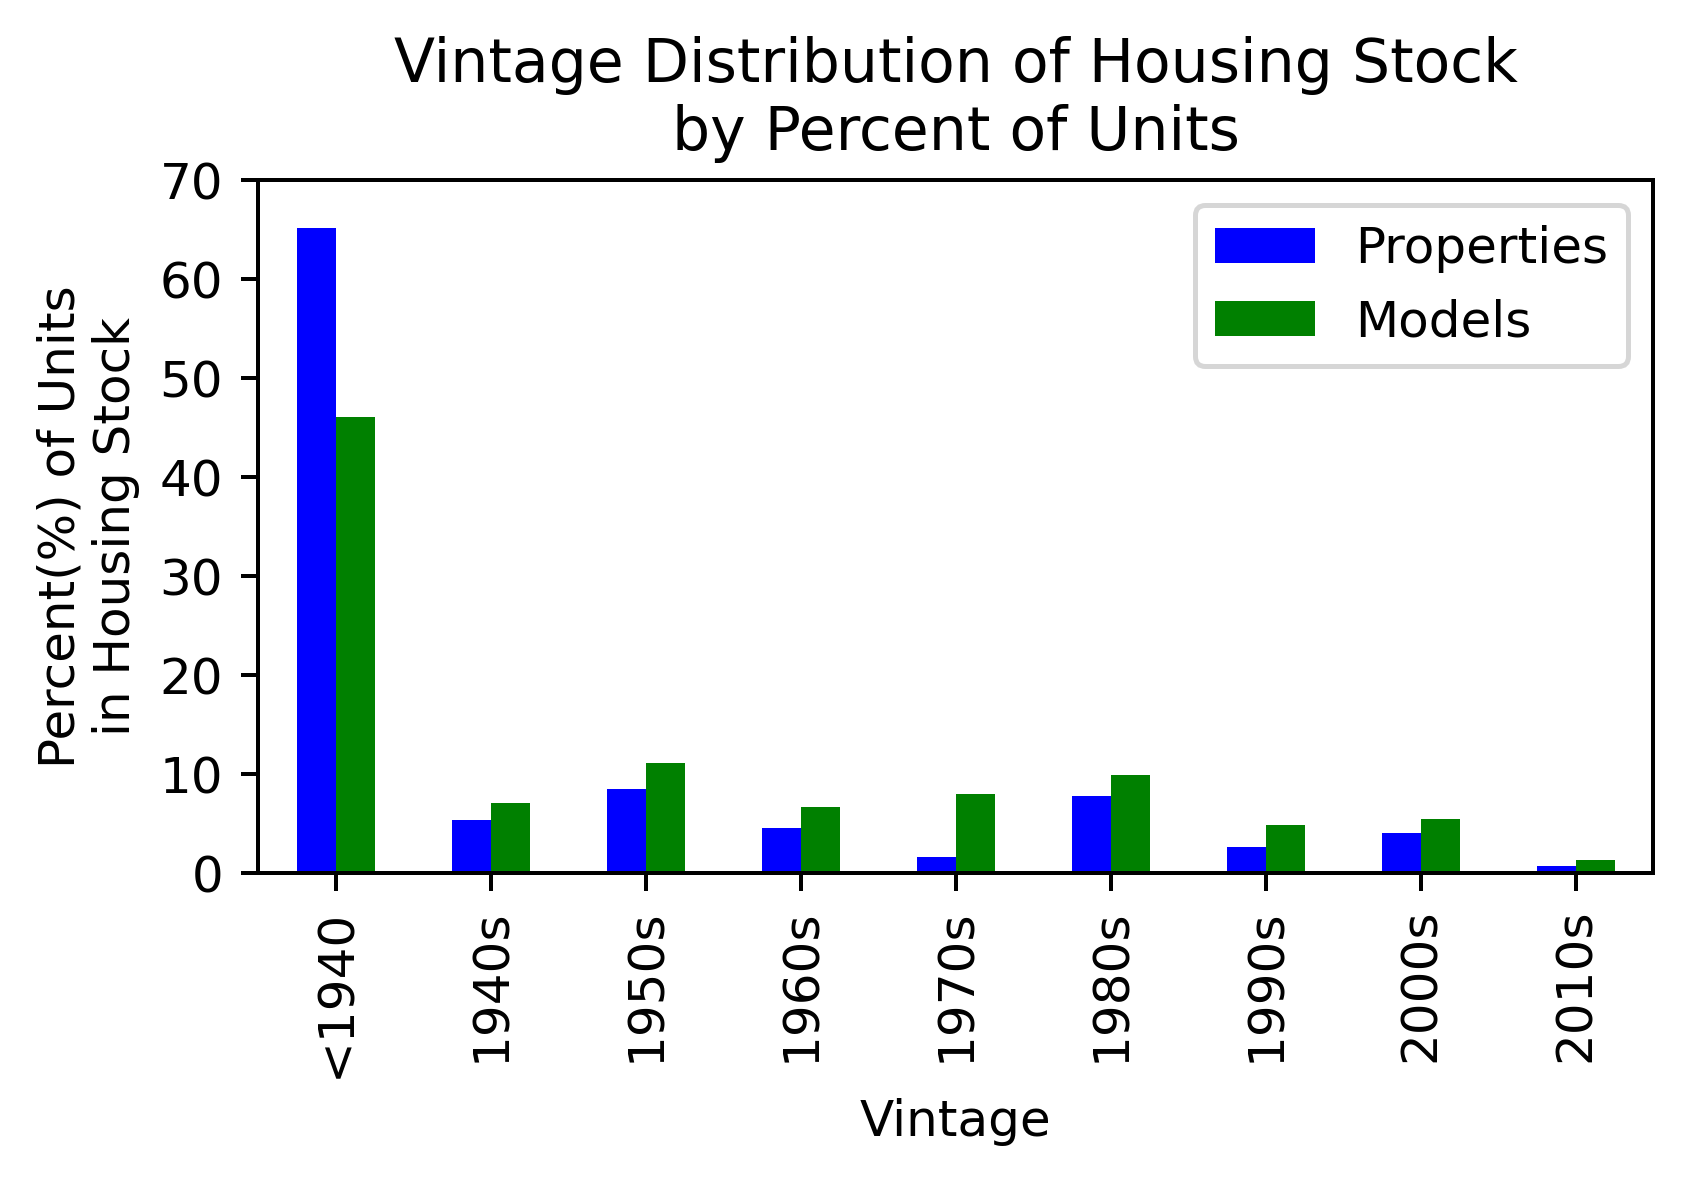

In [5]:
# Vintage as Dwelling Units: 
num_dwellings = parcels['num_units'].sum()
vintage_stats = pd.DataFrame(index =v_ids,columns = ['Properties','Models'])
for each_index in v_ids:
    vintage_stats.loc[vintage_stats.index == each_index,'Properties'] = 100*parcels['num_units'].loc[parcels['vintage_ix'] == each_index].sum()/num_dwellings
    vintage_stats.loc[vintage_stats.index == each_index,'Models'] = 100*len(metadata.loc[metadata['vintage_ix'] == each_index])/num_models
fig = plt.figure(figsize=(5,2.5),dpi=360)
vintage_stats.plot(kind='bar',stacked=False,color = {'Properties':'blue',"Models":'green'},ax=plt.gca())
plt.xlabel('Vintage')
plt.ylabel('Percent(%) of Units\nin Housing Stock')
plt.xticks(ticks = vintage_stats.index,labels=vintage)
plt.yticks(ticks=np.arange(0,80,10))
plt.ylim([0,70])
plt.title('Vintage Distribution of Housing Stock\nby Percent of Units')
plt.savefig("Figures/Final/vintage_bar.png",bbox_inches = "tight")

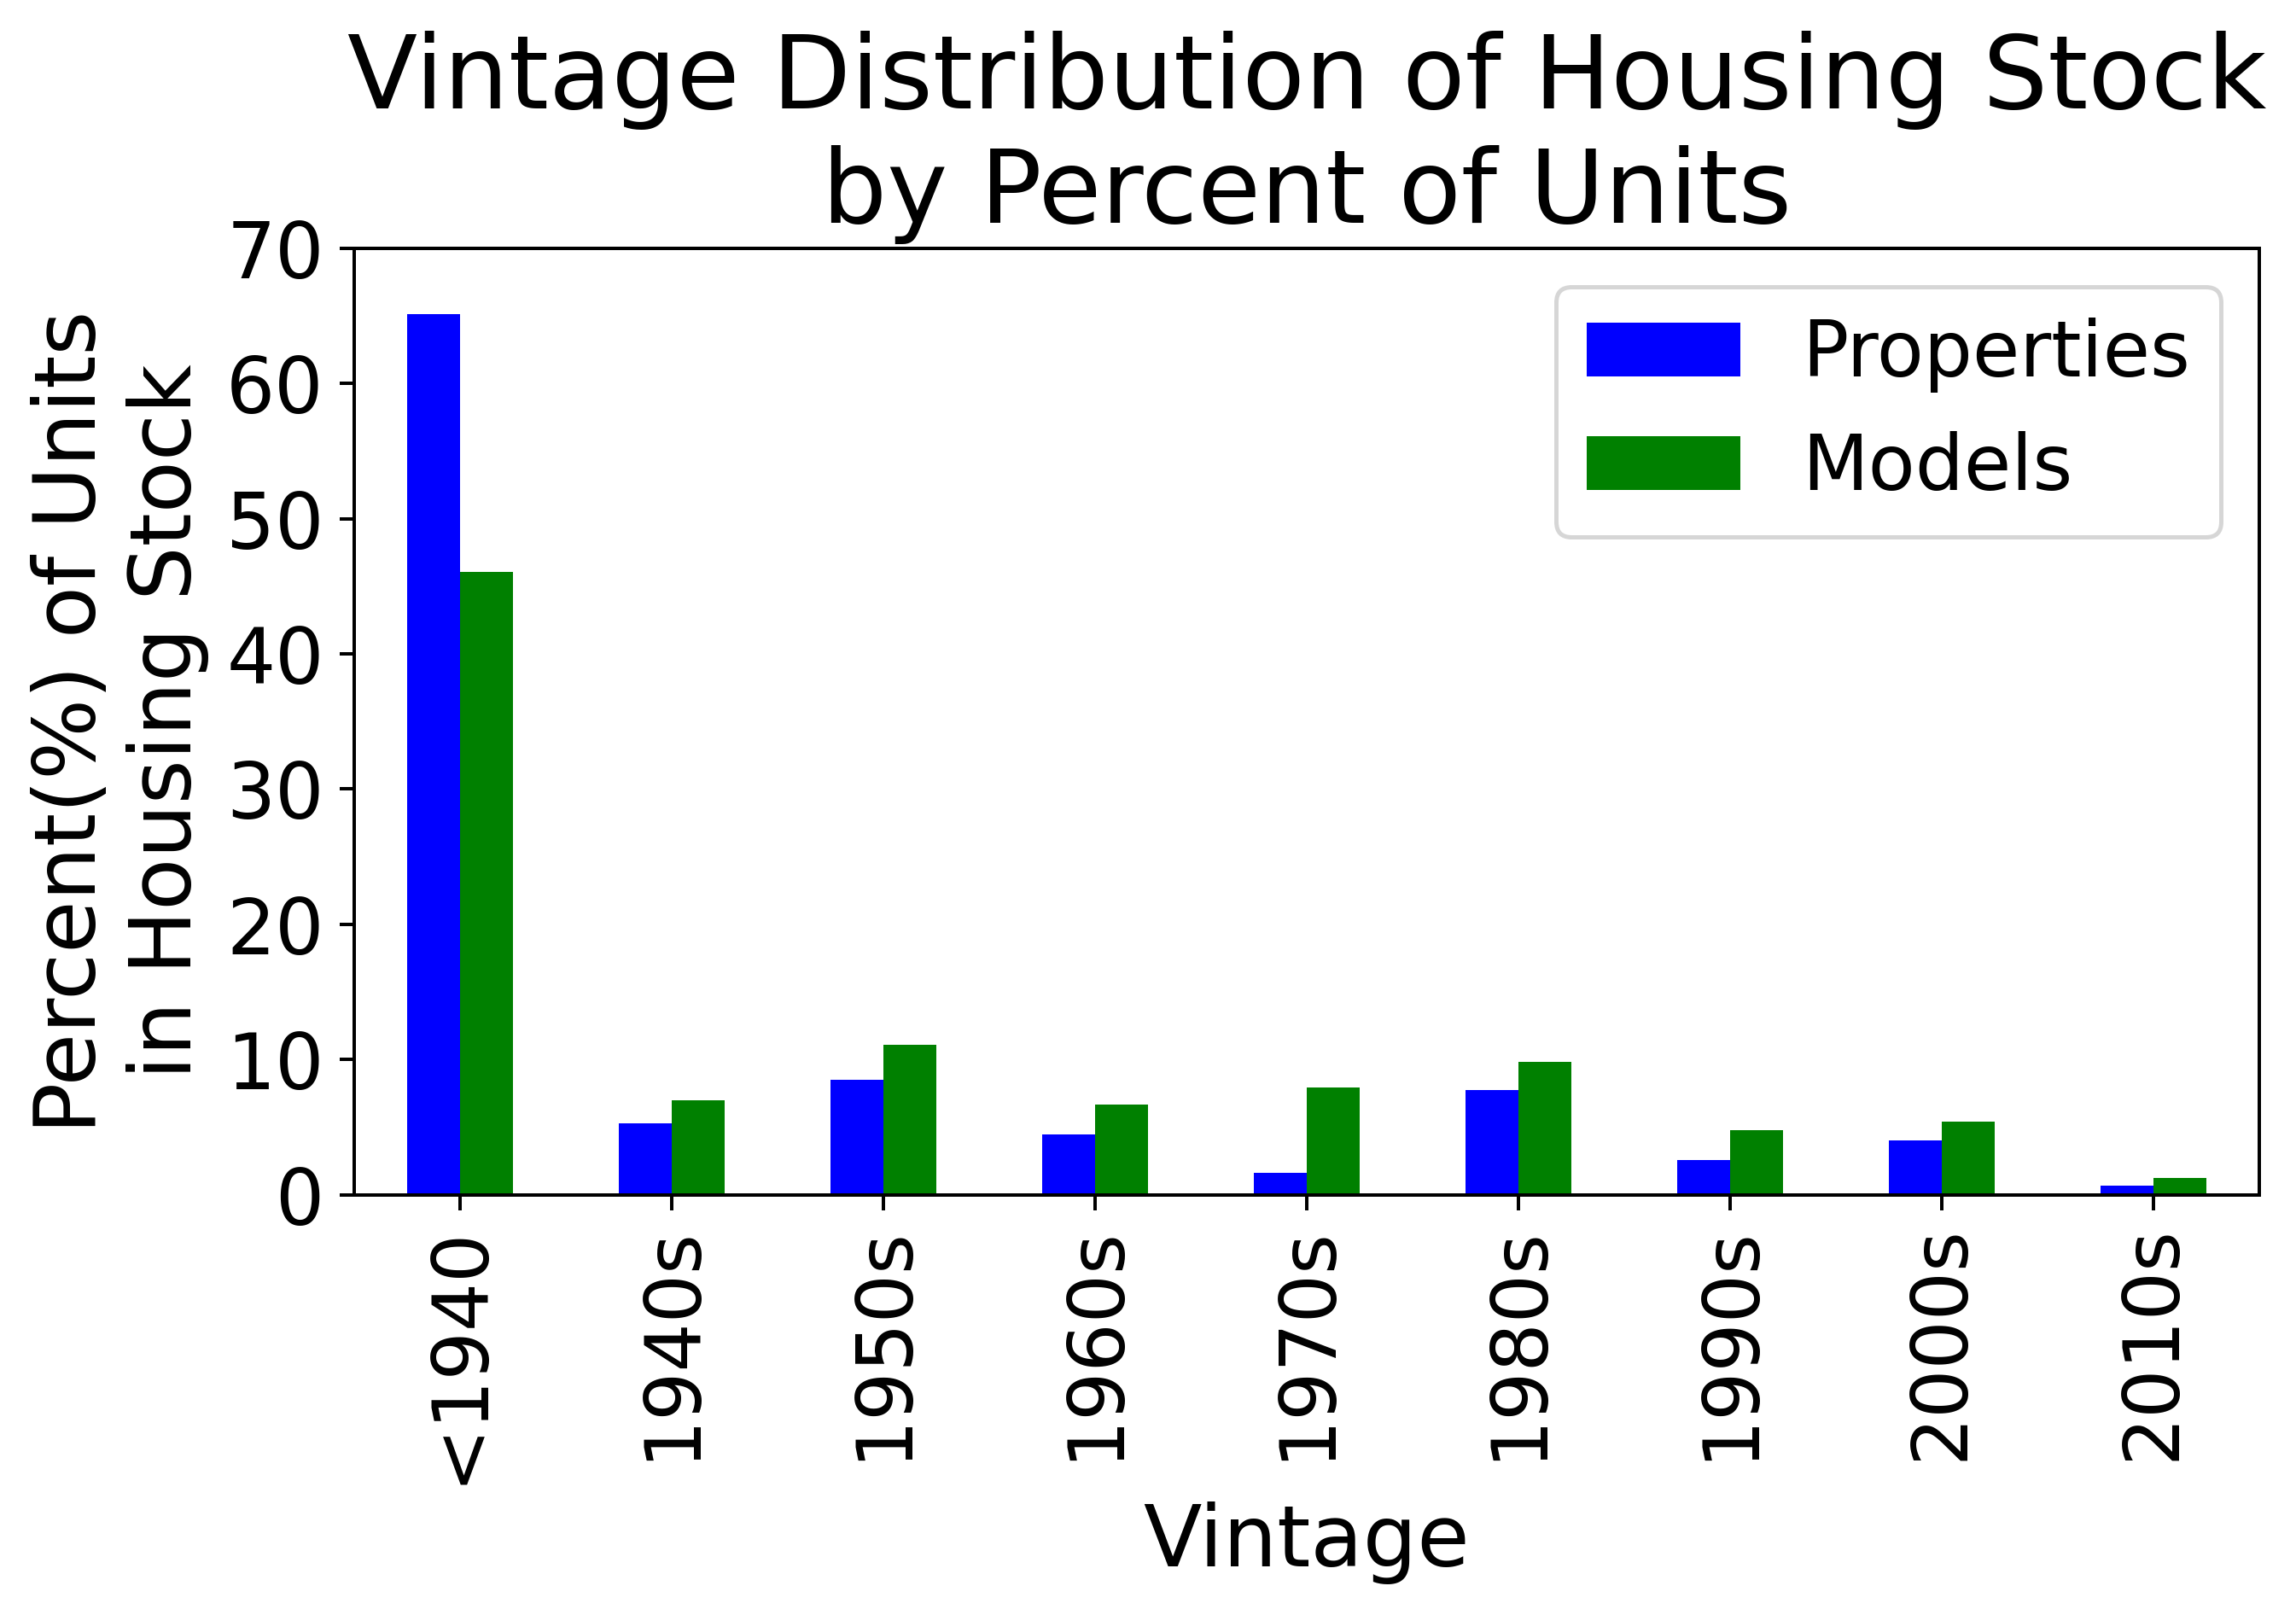

In [6]:
fig = plt.figure(figsize=(8,4),dpi=360)
vintage_stats.plot(kind='bar',stacked=False,color = {'Properties':'blue',"Models":'green'},ax=plt.gca())
plt.xlabel('Vintage',fontsize=20)
plt.ylabel('Percent(%) of Units\nin Housing Stock',fontsize=20)
plt.xticks(ticks = vintage_stats.index,labels=vintage,fontsize=18)
plt.yticks(ticks=np.arange(0,80,10),fontsize=18)
plt.ylim([0,70])
plt.legend(fontsize=18)
plt.title('Vintage Distribution of Housing Stock\nby Percent of Units',fontsize=24)
plt.savefig("Figures/Final/large_vintage_bar.png",bbox_inches = "tight")

In [7]:
# USE UNIT TO DOUBLE CHECK: 
parcels['style_type']= ""
# Assign Style First By Num Units:
parcels.loc[(parcels['num_units'] == 2), 'style_type'] = '2 Unit'
parcels.loc[((parcels['num_units'] >= 3) & (parcels['num_units']<= 4)), 'style_type'] = '3 or 4 Unit'
parcels.loc[((parcels['num_units'] >= 5) & (parcels['num_units'] <=9)) , 'style_type'] = '5 to 9 Unit'
parcels.loc[((parcels['num_units'] >= 10) & (parcels['num_units'] <=19)) , 'style_type'] = '10 to 19 Unit'
parcels.loc[((parcels['num_units'] >= 20) & (parcels['num_units'] <=49)) , 'style_type'] = '20 to 49 Unit'
parcels.loc[(parcels['num_units'] >= 50), 'style_type'] = '50 or more Unit'

# Consider Style Next
parcels.loc[((parcels['units'] == 1) & (parcels['style'] == "Conventional")), 'style_type'] = "Single-Family Detached"
parcels.loc[((parcels['units'] == 1) &(parcels['style'] == "Raised Ranch")), 'style_type'] = "Single-Family Detached"
parcels.loc[((parcels['units'] == 1) &(parcels['style'] == "Ranch")), 'style_type'] = "Single-Family Detached"
parcels.loc[((parcels['units'] == 1) &(parcels['style'] == "Colonial")), 'style_type'] = "Single-Family Detached"
parcels.loc[((parcels['units'] == 1) &(parcels['style'] == "Bungalow")), 'style_type'] = "Single-Family Detached"
parcels.loc[((parcels['units'] == 1) &(parcels['style'] == "Cape Cod")), 'style_type'] = "Single-Family Detached"
parcels.loc[((parcels['units'] == 1) &(parcels['style'] == "Tudor")), 'style_type'] = "Single-Family Detached"
parcels.loc[((parcels['units'] == 1) &(parcels['style'] == "Modern")), 'style_type'] = "Single-Family Detached"
parcels.loc[((parcels['units'] == 1) &(parcels['style'] == "Split Level")), 'style_type'] = "Single-Family Detached"
parcels.loc[((parcels['units'] == 1) &(parcels['style'] == "Victorian")), 'style_type'] = "Single-Family Detached"
parcels.loc[((parcels['units'] == 1) &(parcels['style'] == "Raised Cape")), 'style_type'] = "Single-Family Detached"
parcels.loc[((parcels['units'] == 1) &(parcels['style'] == "Two Family")), 'style_type'] = "2 Unit"
parcels.loc[((parcels['units'] == 1) &(parcels['style'] == "Two Family Conversio")), 'style_type'] = "2 Unit"
parcels.loc[((parcels['units'] == 1) &(parcels['style'] == "Duplex")), 'style_type'] = "2 Unit"
parcels.loc[((parcels['units'] == 1) &(parcels['style'] == "Three Fam Conversion")), 'style_type'] = "3 or 4 Unit"
parcels.loc[((parcels['units'] == 1) &(parcels['style'] == "Three Family")), 'style_type'] = "3 or 4 Unit"
parcels.loc[((parcels['units'] == 1) &(parcels['style'] == "Multi Res 4-8 Units")), 'style_type'] = "5 to 9 Unit"
parcels.loc[((parcels['units'] == 1) & (parcels['style'] == "Half Duplex")), 'style_type'] = "Single-Family Attached"
parcels.loc[((parcels['units'] == 1) & (parcels['style'] == "Converted small apt")), 'style_type'] = "Single-Family Detached"
parcels.loc[((parcels['units'] == 0) & (parcels['style'] == "Converted small apt")), 'style_type'] = "Single-Family Detached"


[6 3 7 4 5 8 2 1]


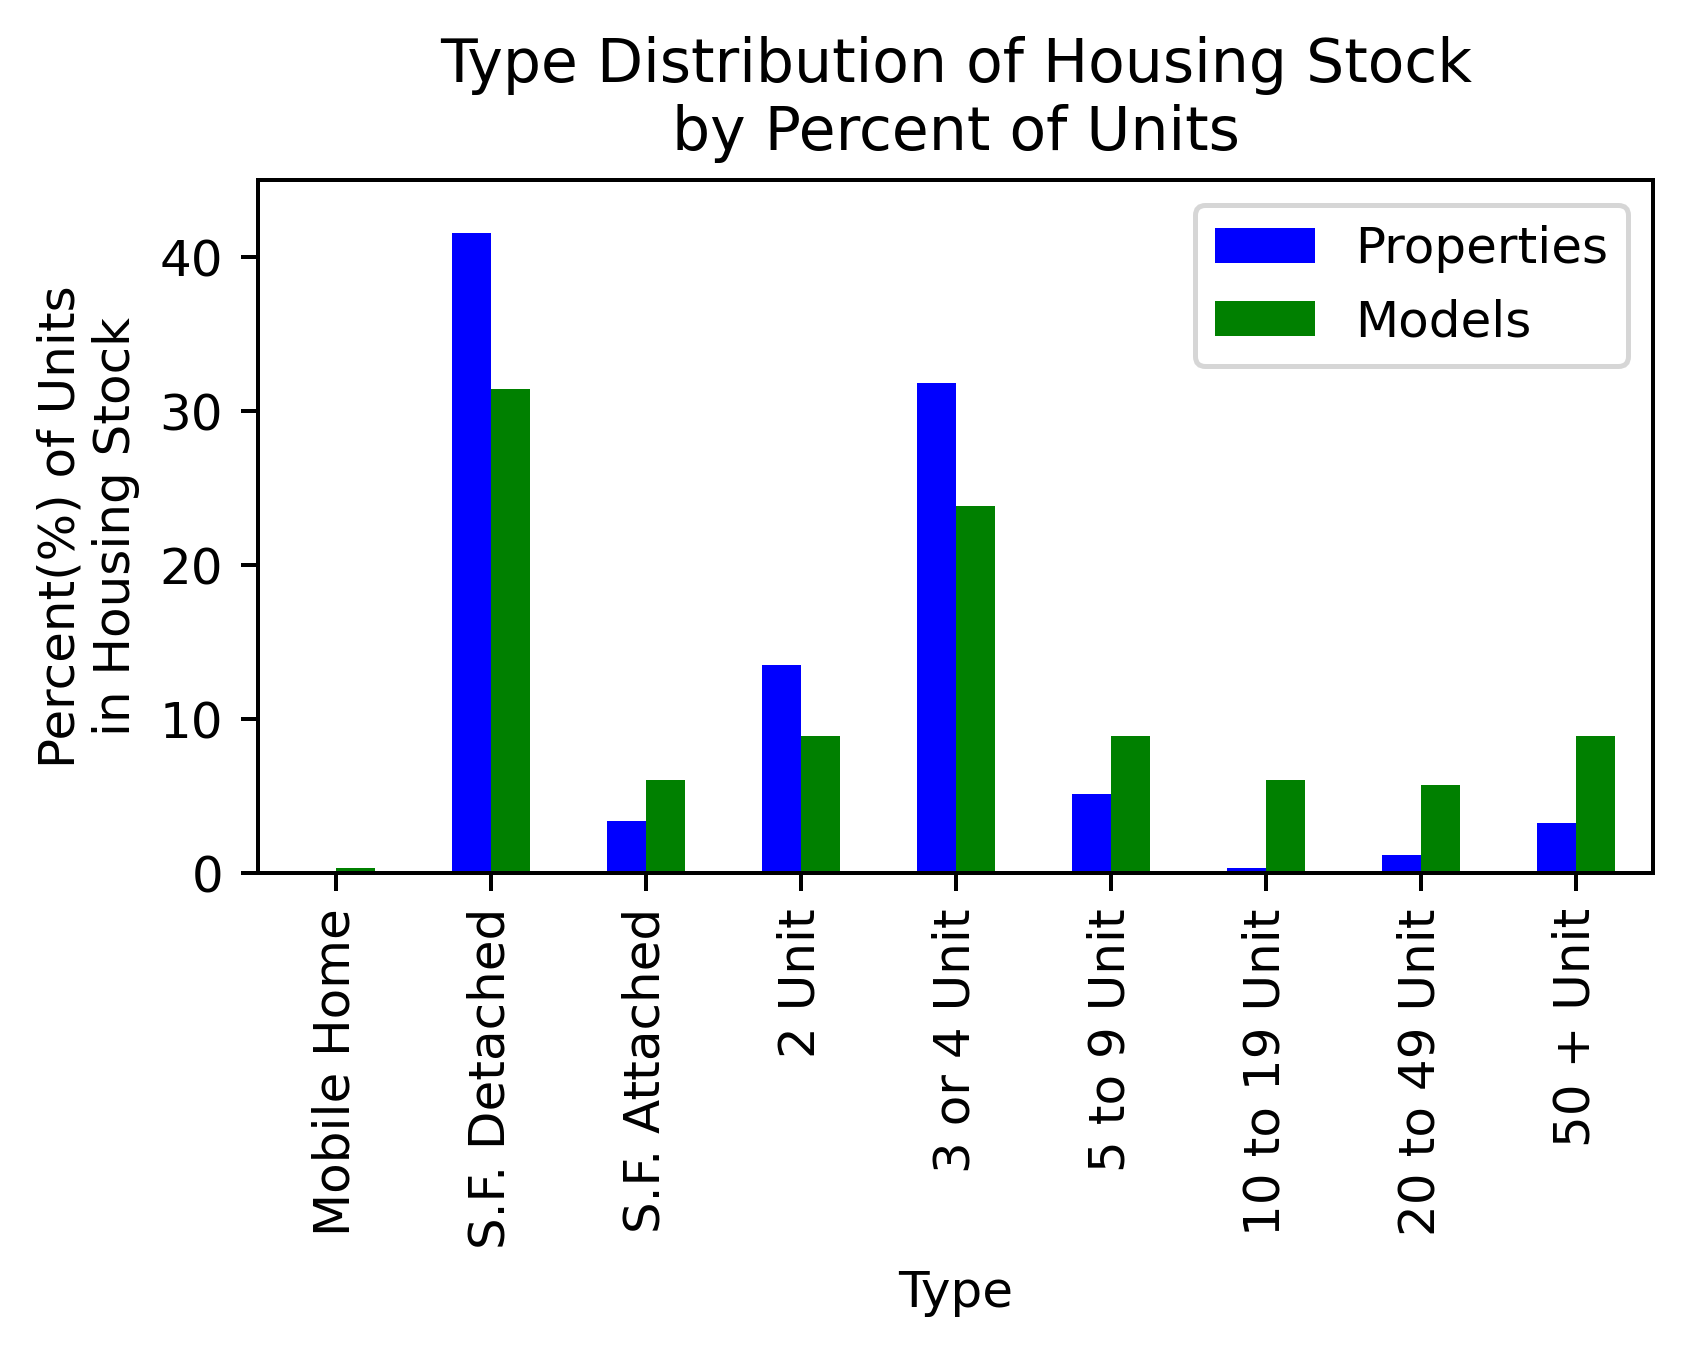

In [8]:


style_stats = pd.DataFrame(index = metadata['type_ix'].unique(),columns = ['Properties','Models'])
for each_index in style_stats.index:
    style_stats.loc[style_stats.index == each_index,'Properties'] = 100*len(parcels.loc[parcels['type_ix'] == each_index])/num_parcels
    style_stats.loc[style_stats.index == each_index,'Models'] = 100*len(metadata.loc[metadata['type_ix'] == each_index])/num_models

# Type as Dwelling Units: 
num_dwellings = parcels['num_units'].sum()
style_stats = pd.DataFrame(index = metadata['type_ix'].unique(),columns = ['Properties','Models'])
for each_index in style_stats.index:
    style_stats.loc[style_stats.index == each_index,'Properties'] = 100*parcels['num_units'].loc[parcels['type_ix'] == each_index].sum()/num_dwellings
    style_stats.loc[style_stats.index == each_index,'Models'] = 100*len(metadata.loc[metadata['type_ix'] == each_index])/num_models
fig = plt.figure(figsize=(5,2.5),dpi=360)
style_stats.plot(kind='bar',stacked=False,color = {'Properties':'blue',"Models":'green'},ax=plt.gca())
styles = ['Mobile Home','S.F. Detached','S.F. Attached','2 Unit','3 or 4 Unit','5 to 9 Unit','10 to 19 Unit','20 to 49 Unit','50 + Unit']
plt.xlabel('Type')
plt.ylabel('Percent(%) of Units\nin Housing Stock')
plt.xticks(ticks = style_stats.index,labels=styles)
plt.yticks(ticks=np.arange(0,80,10))
plt.ylim([0,45])
plt.title('Type Distribution of Housing Stock\nby Percent of Units')
plt.savefig("Figures/Final/type_bar.png",bbox_inches = "tight")

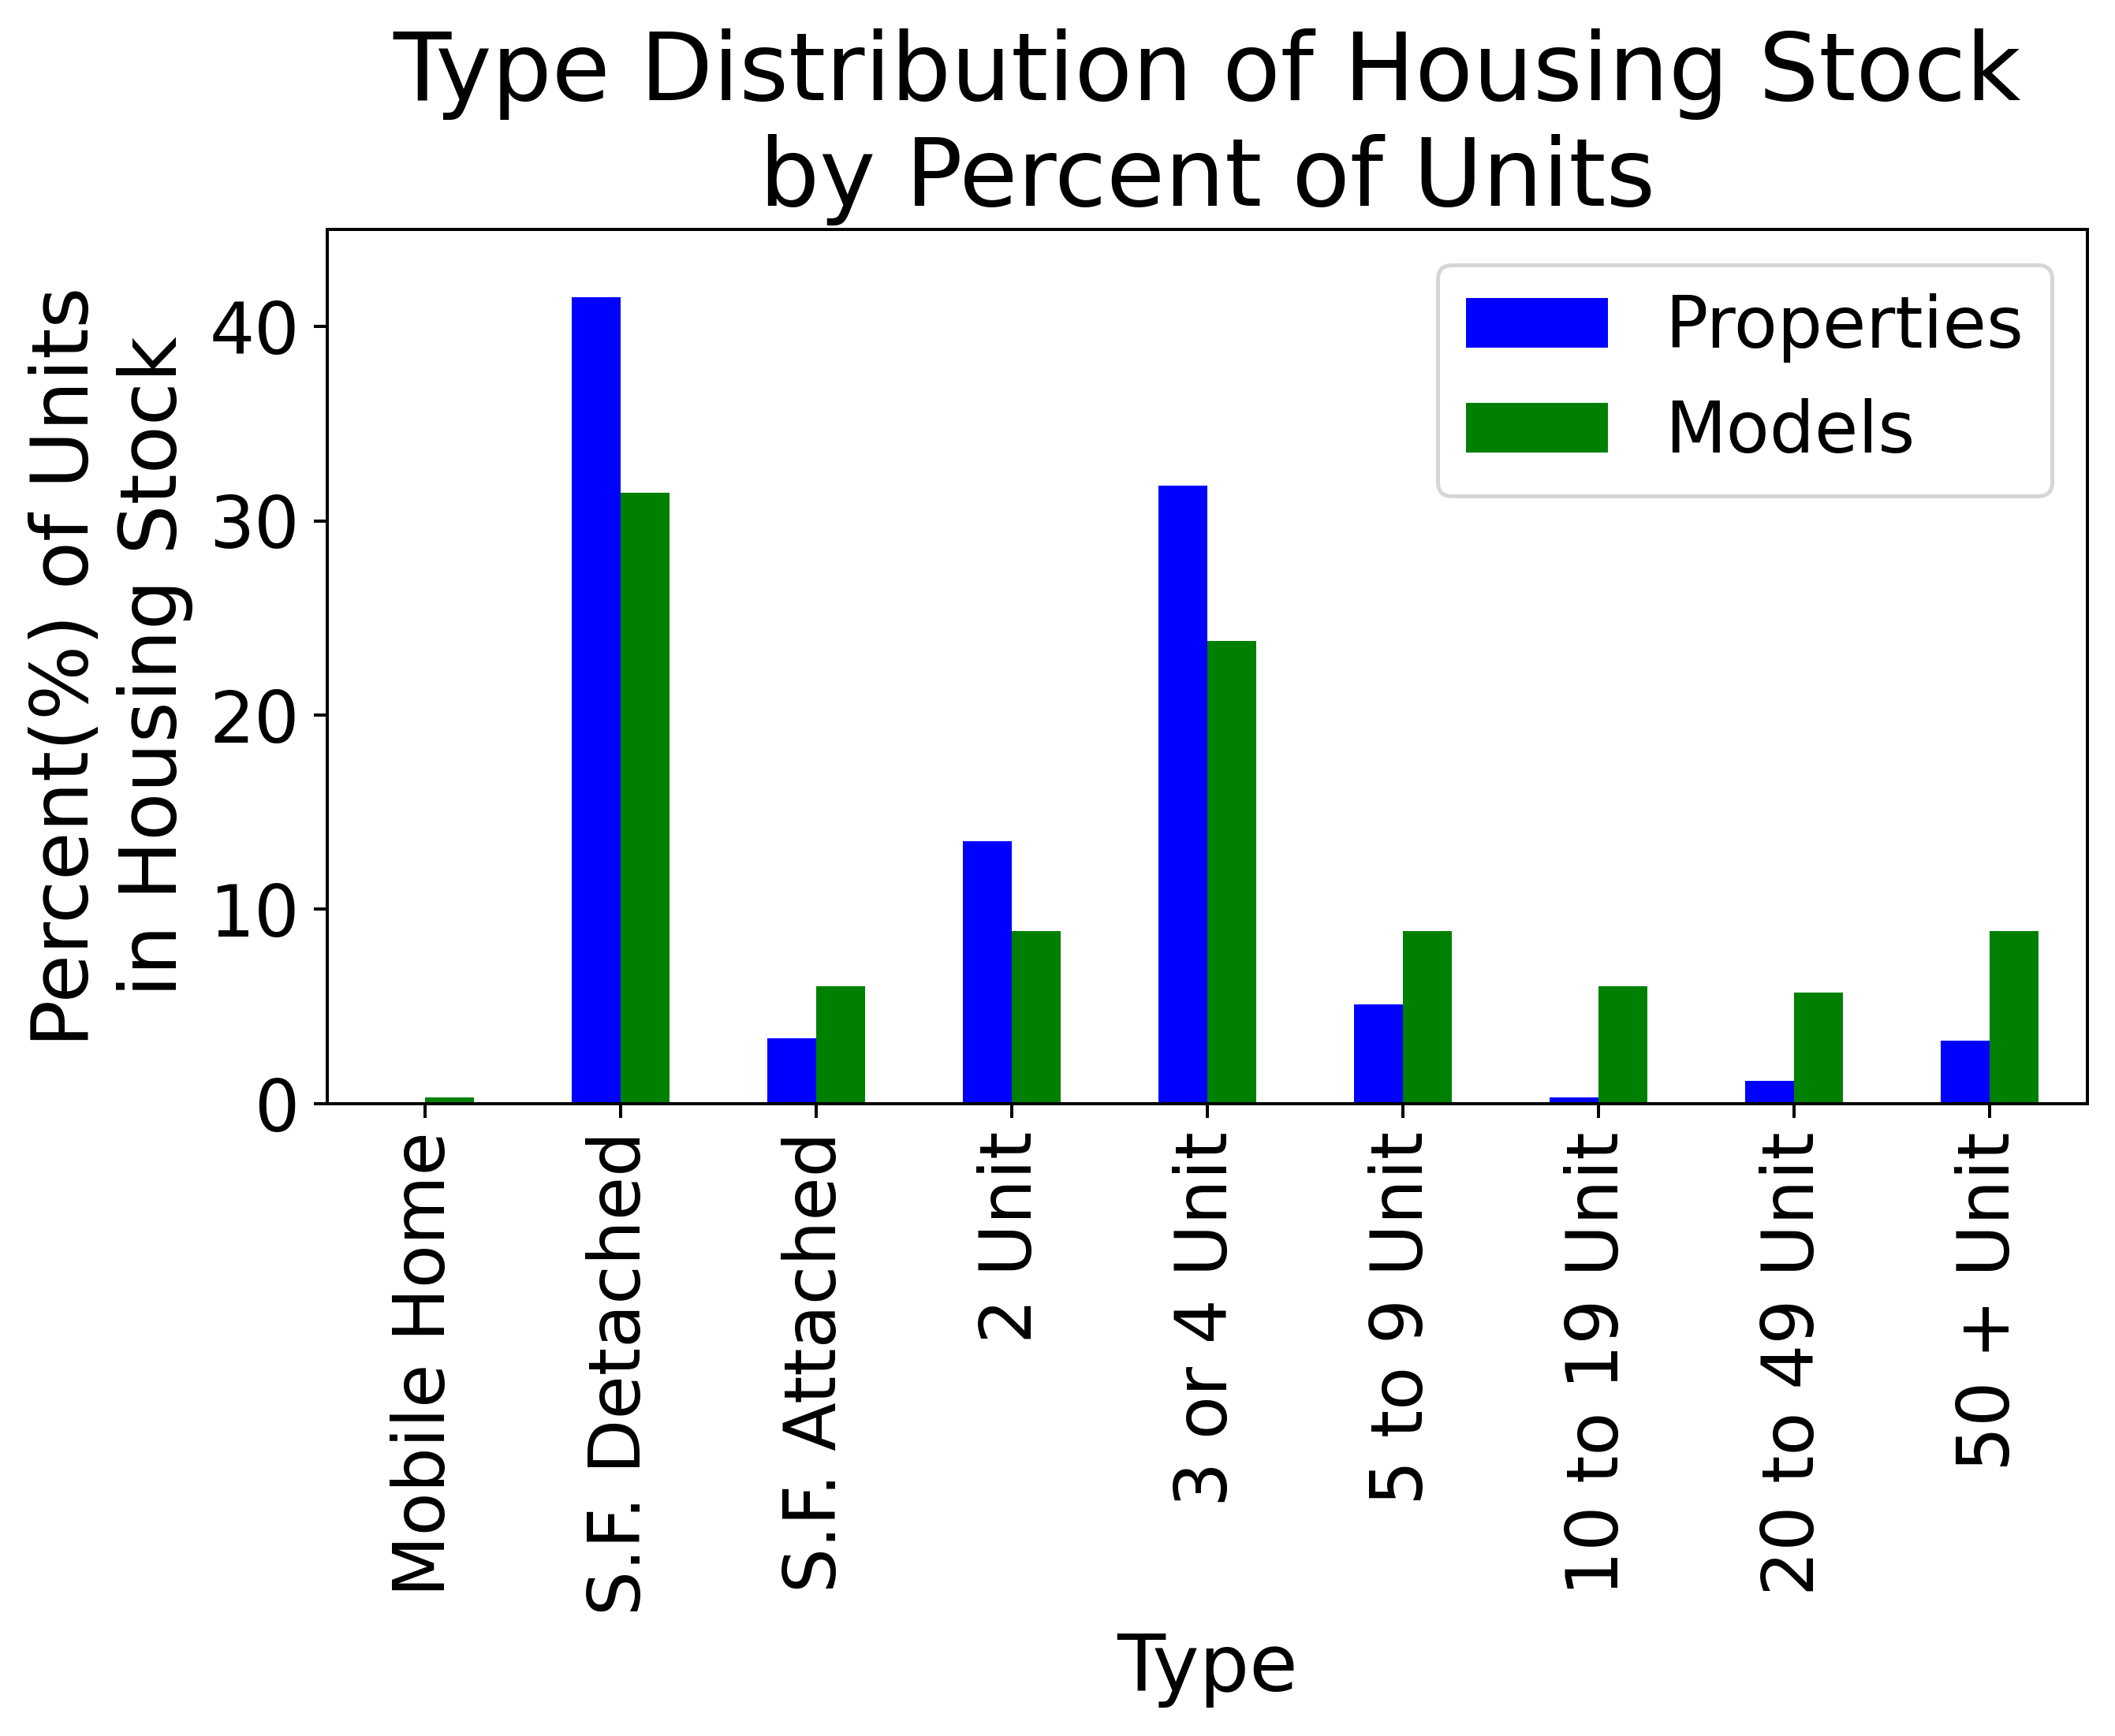

In [9]:
fig = plt.figure(figsize=(8,4),dpi=360)
style_stats.plot(kind='bar',stacked=False,color = {'Properties':'blue',"Models":'green'},ax=plt.gca())
styles = ['Mobile Home','S.F. Detached','S.F. Attached','2 Unit','3 or 4 Unit','5 to 9 Unit','10 to 19 Unit','20 to 49 Unit','50 + Unit']
plt.xlabel('Type',fontsize=20)
plt.ylabel('Percent(%) of Units\nin Housing Stock',fontsize=20)
plt.xticks(ticks = style_stats.index,labels=styles,fontsize=18)
plt.yticks(ticks=np.arange(0,80,10),fontsize=18)
plt.ylim([0,45])
plt.legend(fontsize=18)
plt.title('Type Distribution of Housing Stock\nby Percent of Units',fontsize=24)
plt.savefig("Figures/Final/large_type_bar.png",bbox_inches = "tight")

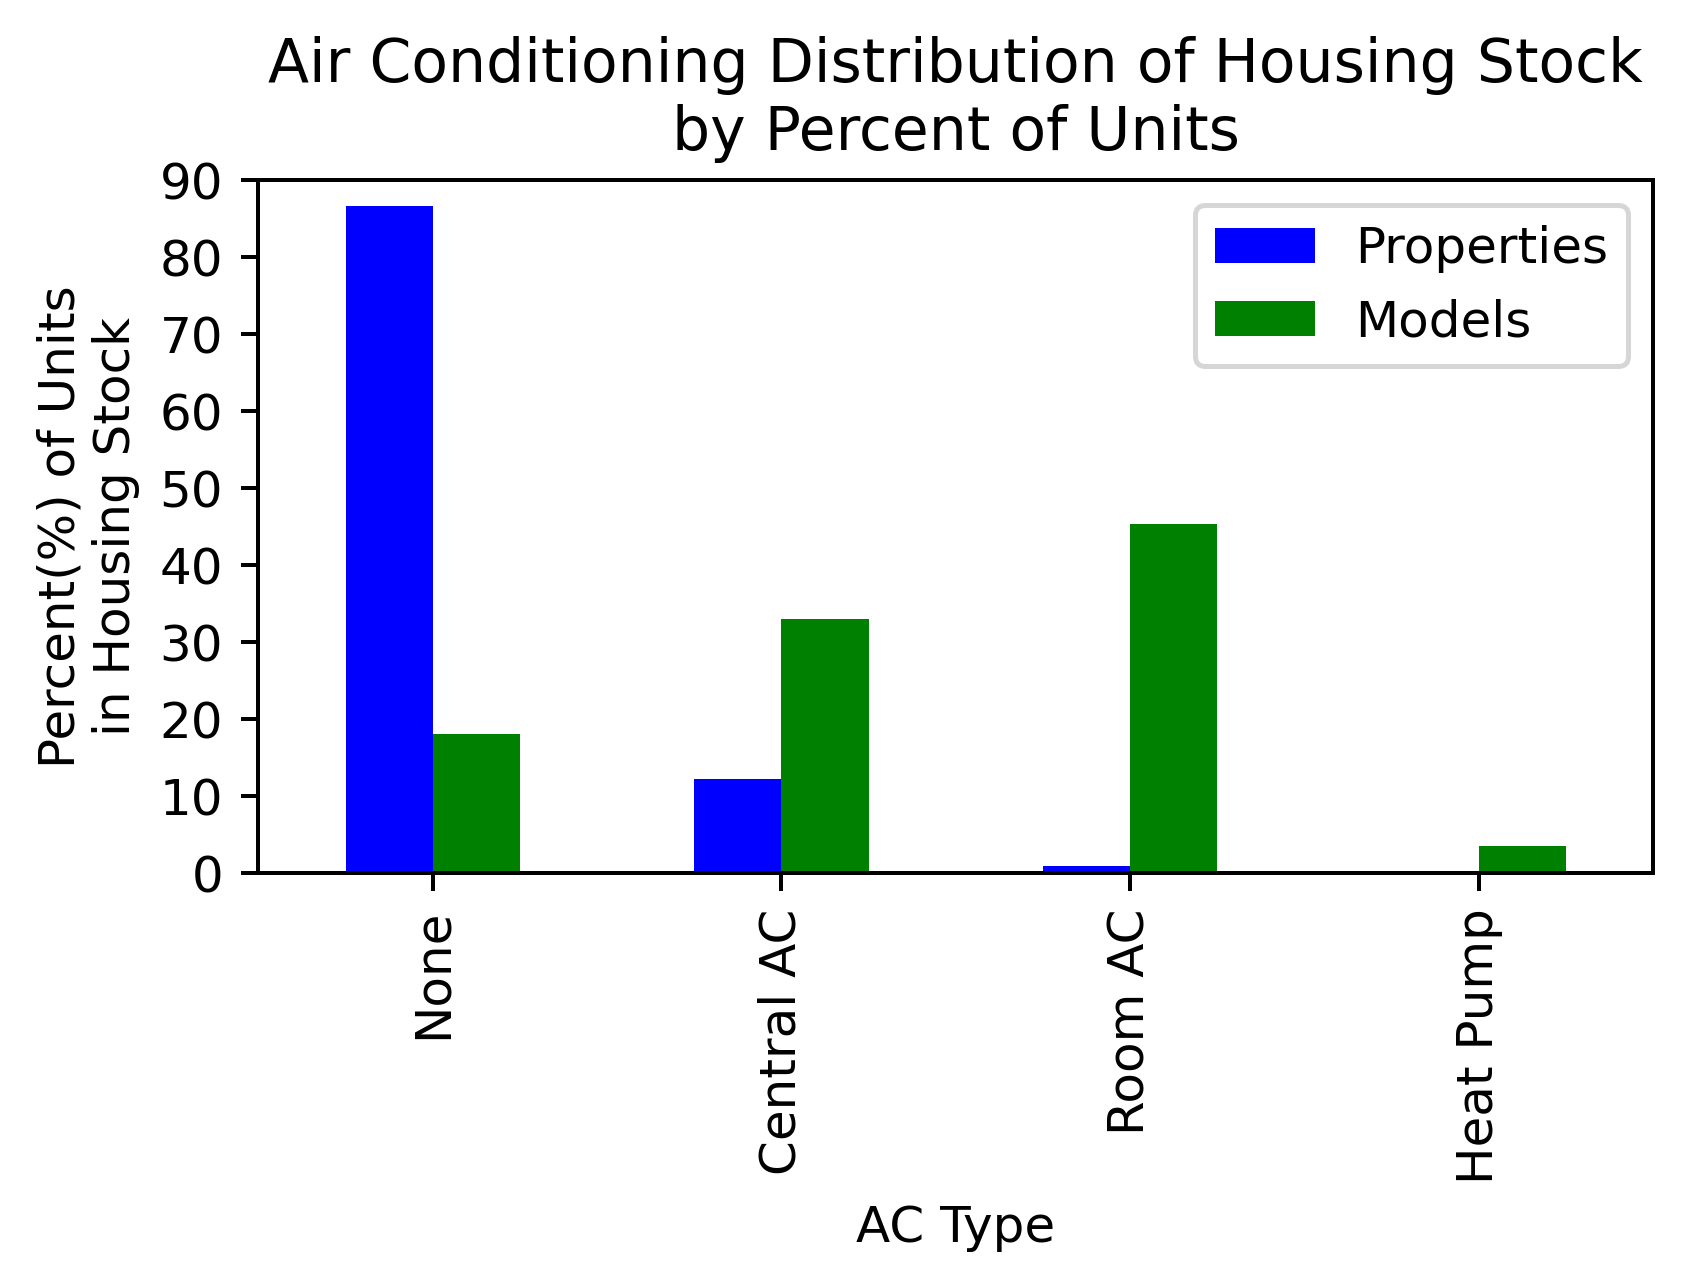

In [10]:
# AC
parcels['ac_type']=""
parcels.loc[(parcels['ac']== "None"),'ac_type'] = "None"
parcels.loc[(parcels['ac']== "Heat Pump"),'ac_type'] = "Heat Pump"
parcels.loc[(parcels['ac']== "Central"),'ac_type'] = "Central AC"
parcels.loc[(parcels['ac']== "Par Central"),'ac_type'] = "Central AC"
parcels.loc[(parcels['ac']== "Partial Wall"),'ac_type'] = "Room AC"
parcels.loc[(parcels['ac']== "Wall Units"),'ac_type'] = "Room AC"
parcels.loc[(parcels['ac']== "AC"),'ac_type'] = "Room AC"

# Style Type Bar Chart
parcels['ac_ix']=0
parcels.loc[parcels['ac_type'] == 'None','ac_ix'] = 0 
parcels.loc[parcels['ac_type'] == 'Central AC','ac_ix'] = 1
parcels.loc[parcels['ac_type'] == 'Room AC','ac_ix'] = 2
parcels.loc[parcels['ac_type'] == 'Heat Pump','ac_ix'] = 3 

# Style Type Bar Chart
metadata['ac_ix']=0
metadata.loc[metadata['in.hvac_cooling_type'] == 'None','ac_ix'] = 0 
metadata.loc[metadata['in.hvac_cooling_type'] == 'Central AC','ac_ix'] = 1
metadata.loc[metadata['in.hvac_cooling_type'] == 'Room AC','ac_ix'] = 2
metadata.loc[metadata['in.hvac_cooling_type'] == 'Heat Pump','ac_ix'] = 3 
metadata=metadata.sort_values(by='ac_ix', ascending=True)
a_ids = metadata['ac_ix'].unique()
a_ids.sort()
ac =['None','Central AC','Room AC','Heat Pump']

ac_stats = pd.DataFrame(index = a_ids,columns = ['Properties','Models'])
for each_index in a_ids:
    ac_stats.loc[ac_stats.index == each_index,'Properties'] = 100*len(parcels.loc[parcels['ac_ix'] == each_index])/num_parcels
    ac_stats.loc[ac_stats.index == each_index,'Models'] = 100*len(metadata.loc[metadata['ac_ix'] == each_index])/num_models

# Vintage as Dwelling Units: 
num_dwellings = parcels['num_units'].sum()
ac_stats = pd.DataFrame(index =a_ids,columns = ['Properties','Models'])
for each_index in a_ids:
    ac_stats.loc[ac_stats.index == each_index,'Properties'] = 100*parcels['num_units'].loc[parcels['ac_ix'] == each_index].sum()/num_dwellings
    ac_stats.loc[ac_stats.index == each_index,'Models'] = 100*len(metadata.loc[metadata['ac_ix'] == each_index])/num_models
fig = plt.figure(figsize=(5,2.5),dpi=360)
ac_stats.plot(kind='bar',stacked=False,color = {'Properties':'blue',"Models":'green'},ax=plt.gca())
plt.xlabel('AC Type')
plt.ylabel('Percent(%) of Units\nin Housing Stock')
plt.xticks(ticks = ac_stats.index,labels=ac)
plt.yticks(ticks=np.arange(0,100,10))
plt.ylim([0,90])
plt.title('Air Conditioning Distribution of Housing Stock\nby Percent of Units')
plt.savefig("Figures/Final/ac_bar.png",bbox_inches = "tight")

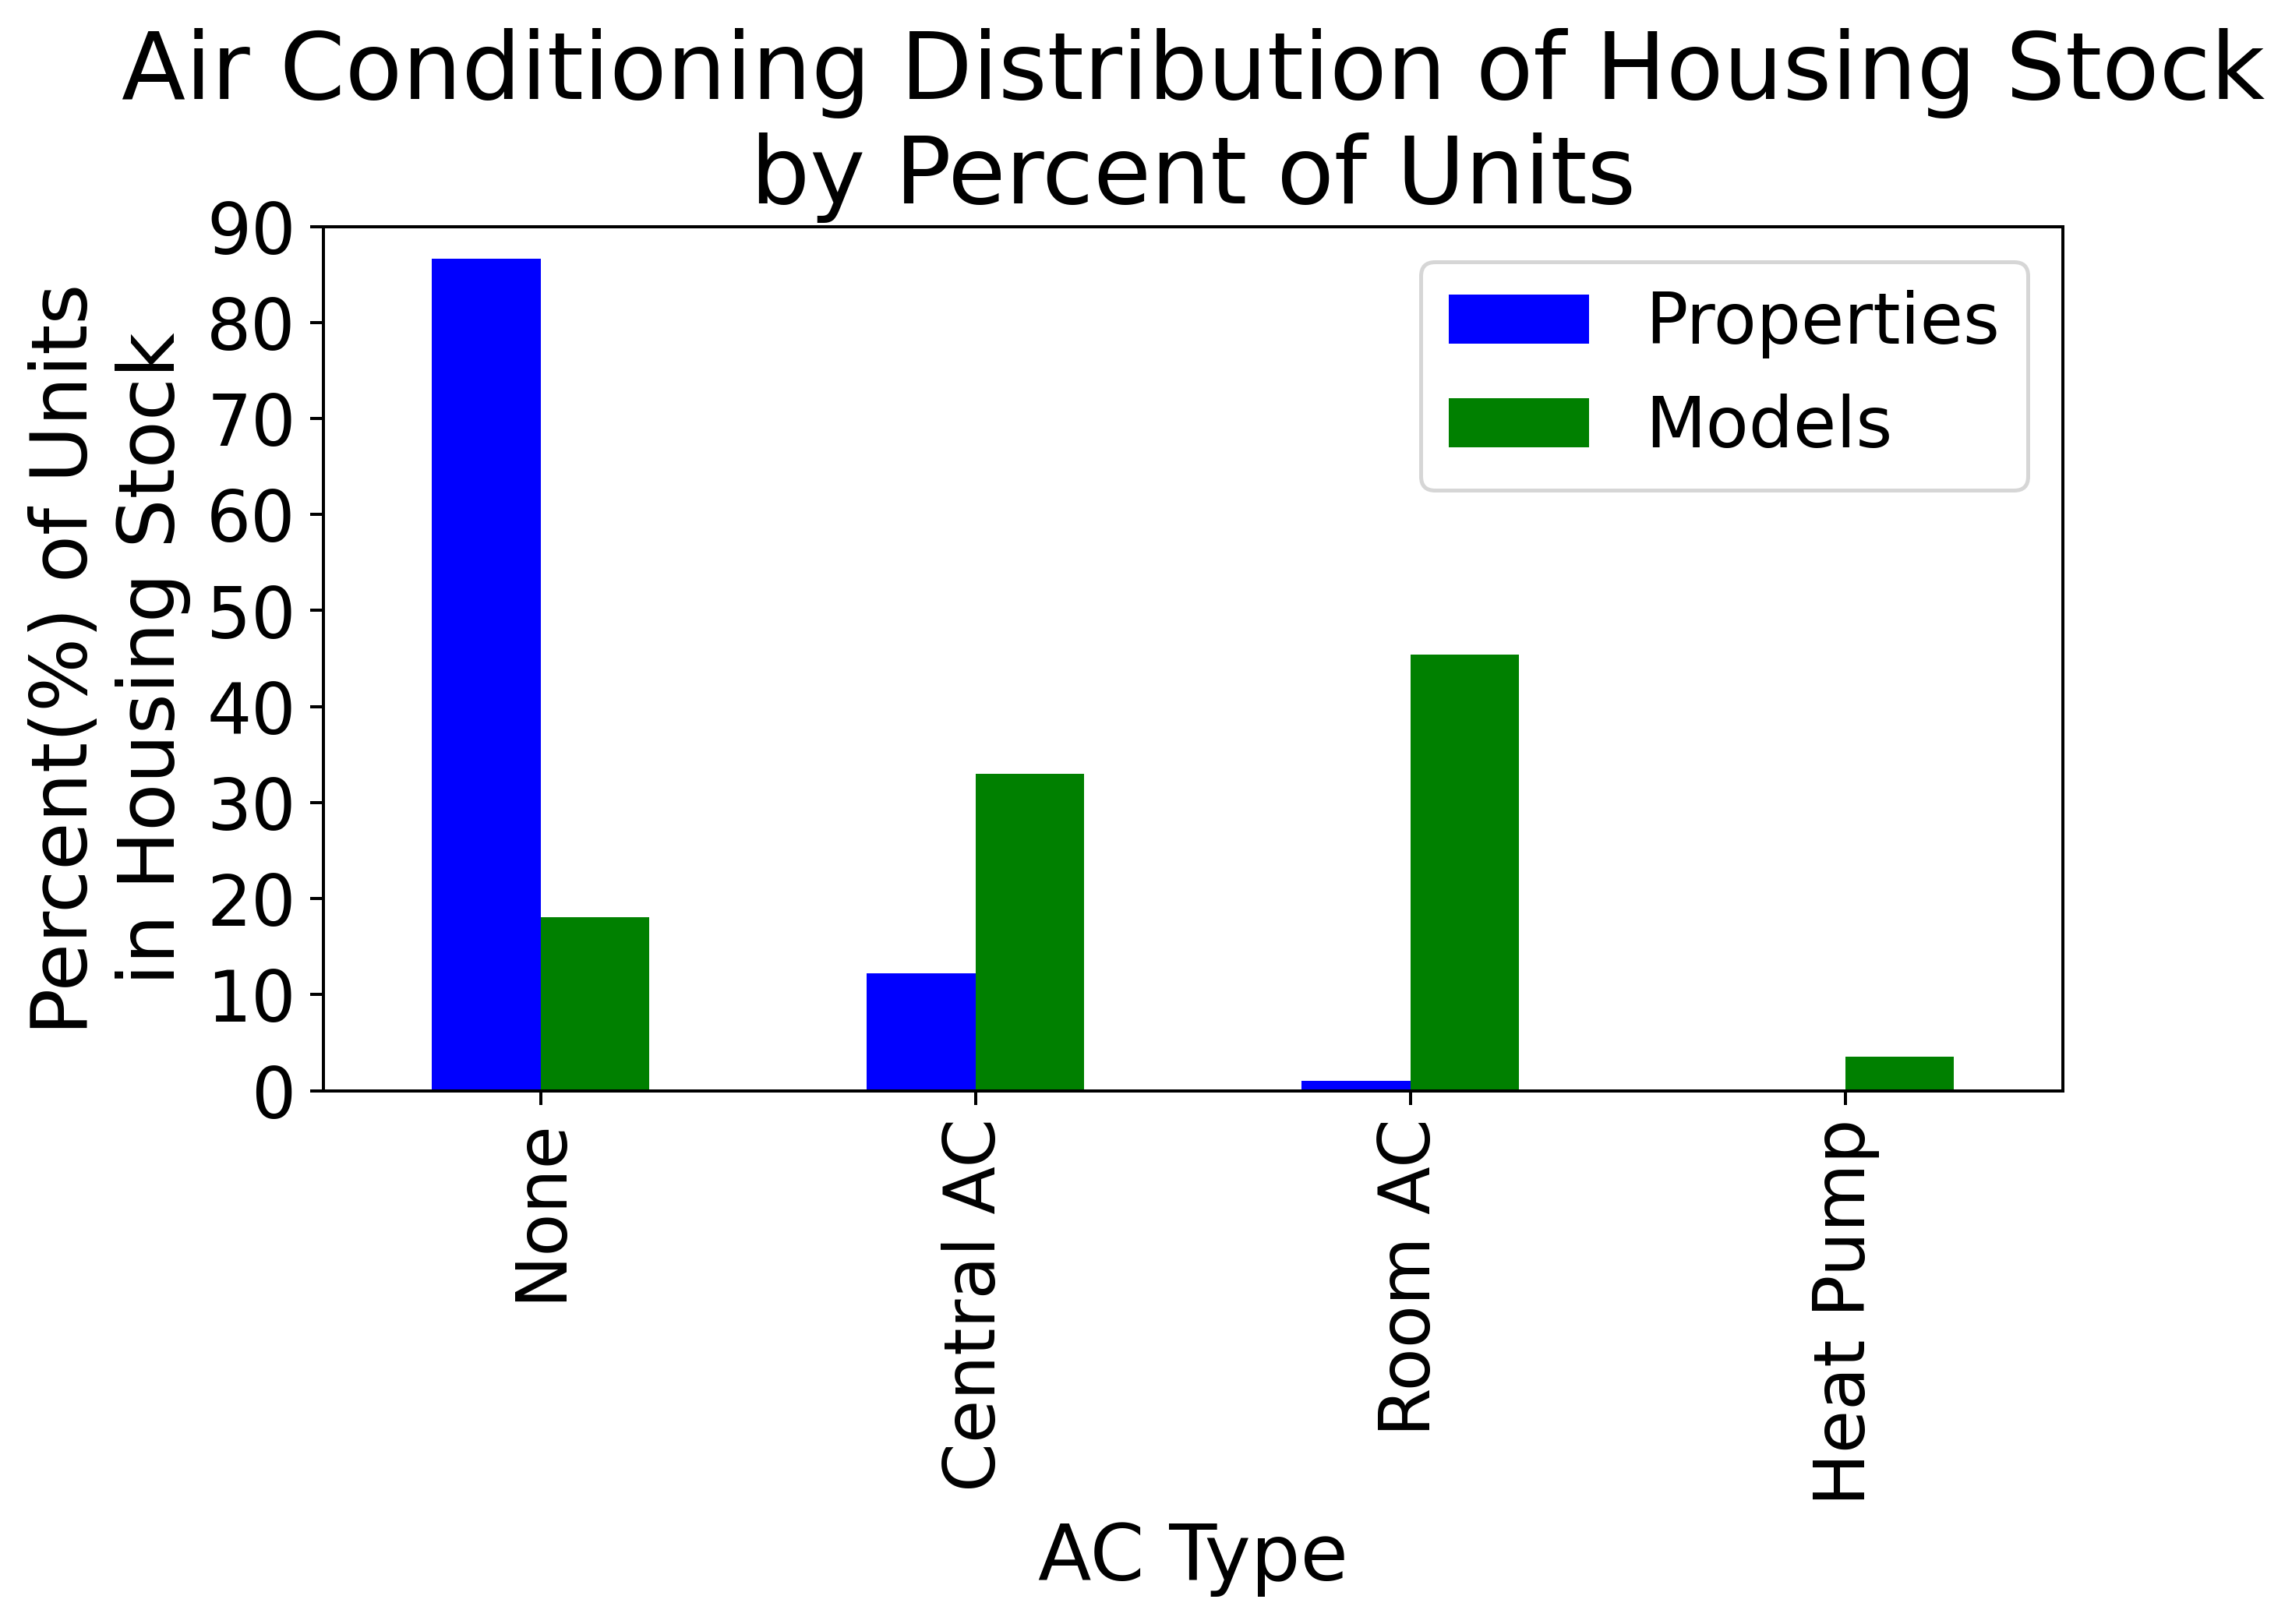

In [11]:
fig = plt.figure(figsize=(8,4),dpi=360)
ac_stats.plot(kind='bar',stacked=False,color = {'Properties':'blue',"Models":'green'},ax=plt.gca())
plt.xlabel('AC Type',fontsize=20)
plt.ylabel('Percent(%) of Units\nin Housing Stock',fontsize=20)
plt.xticks(ticks = ac_stats.index,labels=ac,fontsize=18)
plt.yticks(ticks=np.arange(0,100,10),fontsize=18)
plt.ylim([0,90])
plt.legend(fontsize=18)
plt.title('Air Conditioning Distribution of Housing Stock\nby Percent of Units',fontsize=24)
plt.savefig("Figures/Final/large_ac_bar.png",bbox_inches = "tight")

In [12]:
# Rename Types to Shorter Styles
parcels.loc[parcels['style_type'] == 'Single-Family Detached','style_type'] = 'S.F. Detached'
parcels.loc[parcels['style_type'] == 'Single-Family Attached','style_type'] = 'S.F. Attached'
parcels.loc[parcels['style_type'] == '50 or more Unit','style_type'] = '50 + Unit'

# Keep only LOC_ID, Vintage, Type, and AC 
matched_parcels=parcels[['vintage','style_type','ac_type','num_units']]
v_ids = matched_parcels['vintage'].unique()
v_ids.sort()

t_ids = matched_parcels['style_type'].unique()
t_ids.sort()

In [13]:
matched_parcels
each_vintage = v_ids[0]
each_type = t_ids[0]
subset = matched_parcels.loc[(matched_parcels['vintage']==each_vintage) & (matched_parcels['style_type'] == each_type) & (matched_parcels['ac_type']== 'None')]
subset.empty

True

In [14]:
no_ac_plot = pd.DataFrame(index=styles,columns=vintage)

for each_type in t_ids:
    for each_vintage in v_ids:  
        subset = matched_parcels.loc[(matched_parcels['vintage']==each_vintage) & (matched_parcels['style_type'] == each_type) & (matched_parcels['ac_type']== 'None')]
        if subset.empty is False:
            no_ac_plot[each_vintage][each_type]=len(subset)
        else:
            no_ac_plot[each_vintage][each_type]=0
print(no_ac_plot)

              <1940 1940s 1950s 1960s 1970s 1980s 1990s 2000s 2010s
Mobile Home     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
S.F. Detached  8759  2067  3373  1614   339  1074   716   525    17
S.F. Attached    28     8     2     2    24   598   147   301     1
2 Unit         2710   181   112    87    48   133    36    35     3
3 or 4 Unit    5089     8    35    10    11    17     1    10     3
5 to 9 Unit     376     4    17     9     5     9     1     2     1
10 to 19 Unit     0     0     0     1     0     3     0     1     0
20 to 49 Unit     0     2     0     0     0     4     0     0     0
50 + Unit         0     0     0     0     0     1     0     0     0


In [15]:
ac_plot = pd.DataFrame(index=styles,columns=vintage)
for each_type in t_ids:
    for each_vintage in v_ids:  
        subset = matched_parcels.loc[(matched_parcels['vintage']==each_vintage) & (matched_parcels['style_type'] == each_type) & (matched_parcels['ac_type']!= 'None')]
        if subset.empty is False:
            ac_plot[each_vintage][each_type]=len(subset)
        else:
            ac_plot[each_vintage][each_type]=0
print(ac_plot)

              <1940 1940s 1950s 1960s 1970s 1980s 1990s 2000s 2010s
Mobile Home     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
S.F. Detached   598   166   581   315   110   290   366   608   170
S.F. Attached     0     1     0     0     8    97    31   418    85
2 Unit          134     7    10     4     3    11     3    16    17
3 or 4 Unit     186     0     0     0     0     1     0     6     8
5 to 9 Unit      15     0     3     0     1     2     0     1     1
10 to 19 Unit     4     0     0     0     0     2     0     2     0
20 to 49 Unit     4     0     0     2     1     5     0     1     0
50 + Unit         3     0     0     1     1    12     0     0     0


In [16]:
no_ac_plot.loc[no_ac_plot.index=='Mobile Home'] = 0
ac_plot.loc[ac_plot.index=='Mobile Home'] = 0
num_no = no_ac_plot.sum().sum()
num_ac = ac_plot.sum().sum()
total_num = num_no + num_ac

# turn into percents 
no_ac_plot = 100*no_ac_plot/num_no
ac_plot = 100*ac_plot/num_ac
# add total to columns and index
no_ac_plot['Type Total'] = no_ac_plot.sum(axis=1)
ac_plot['Type Total'] = ac_plot.sum(axis=1)
no_ac_plot.loc['Vintage Total'] = no_ac_plot.sum()
ac_plot.loc['Vintage Total'] = ac_plot.sum()
ac_plot = ac_plot.apply(pd.to_numeric, errors='coerce',downcast='integer')
no_ac_plot = no_ac_plot.apply(pd.to_numeric, errors='coerce',downcast='integer')
print(ac_plot)
print(no_ac_plot)

                   <1940     1940s      1950s     1960s     1970s     1980s  \
Mobile Home     0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
S.F. Detached  13.871492  3.850615  13.477151  7.306889  2.551612  6.726977   
S.F. Attached   0.000000  0.023196   0.000000  0.000000  0.185572  2.250058   
2 Unit          3.108328  0.162375   0.231965  0.092786  0.069589  0.255161   
3 or 4 Unit     4.314544  0.000000   0.000000  0.000000  0.000000  0.023196   
5 to 9 Unit     0.347947  0.000000   0.069589  0.000000  0.023196  0.046393   
10 to 19 Unit   0.092786  0.000000   0.000000  0.000000  0.000000  0.046393   
20 to 49 Unit   0.092786  0.000000   0.000000  0.046393  0.023196  0.115982   
50 + Unit       0.069589  0.000000   0.000000  0.023196  0.023196  0.278358   
Vintage Total  21.897472  4.036186  13.778706  7.469265  2.876363  9.742519   

                  1990s      2000s     2010s  Type Total  
Mobile Home    0.000000   0.000000  0.000000    0.000000  
S.F. Detache

In [17]:
colors = sns.color_palette('Greys', 6)
levels = [0, .000001,1, 10, 50, 100]#0,10000,20000]
cmap, norm = mpl.colors.from_levels_and_colors(levels, colors, extend="max")

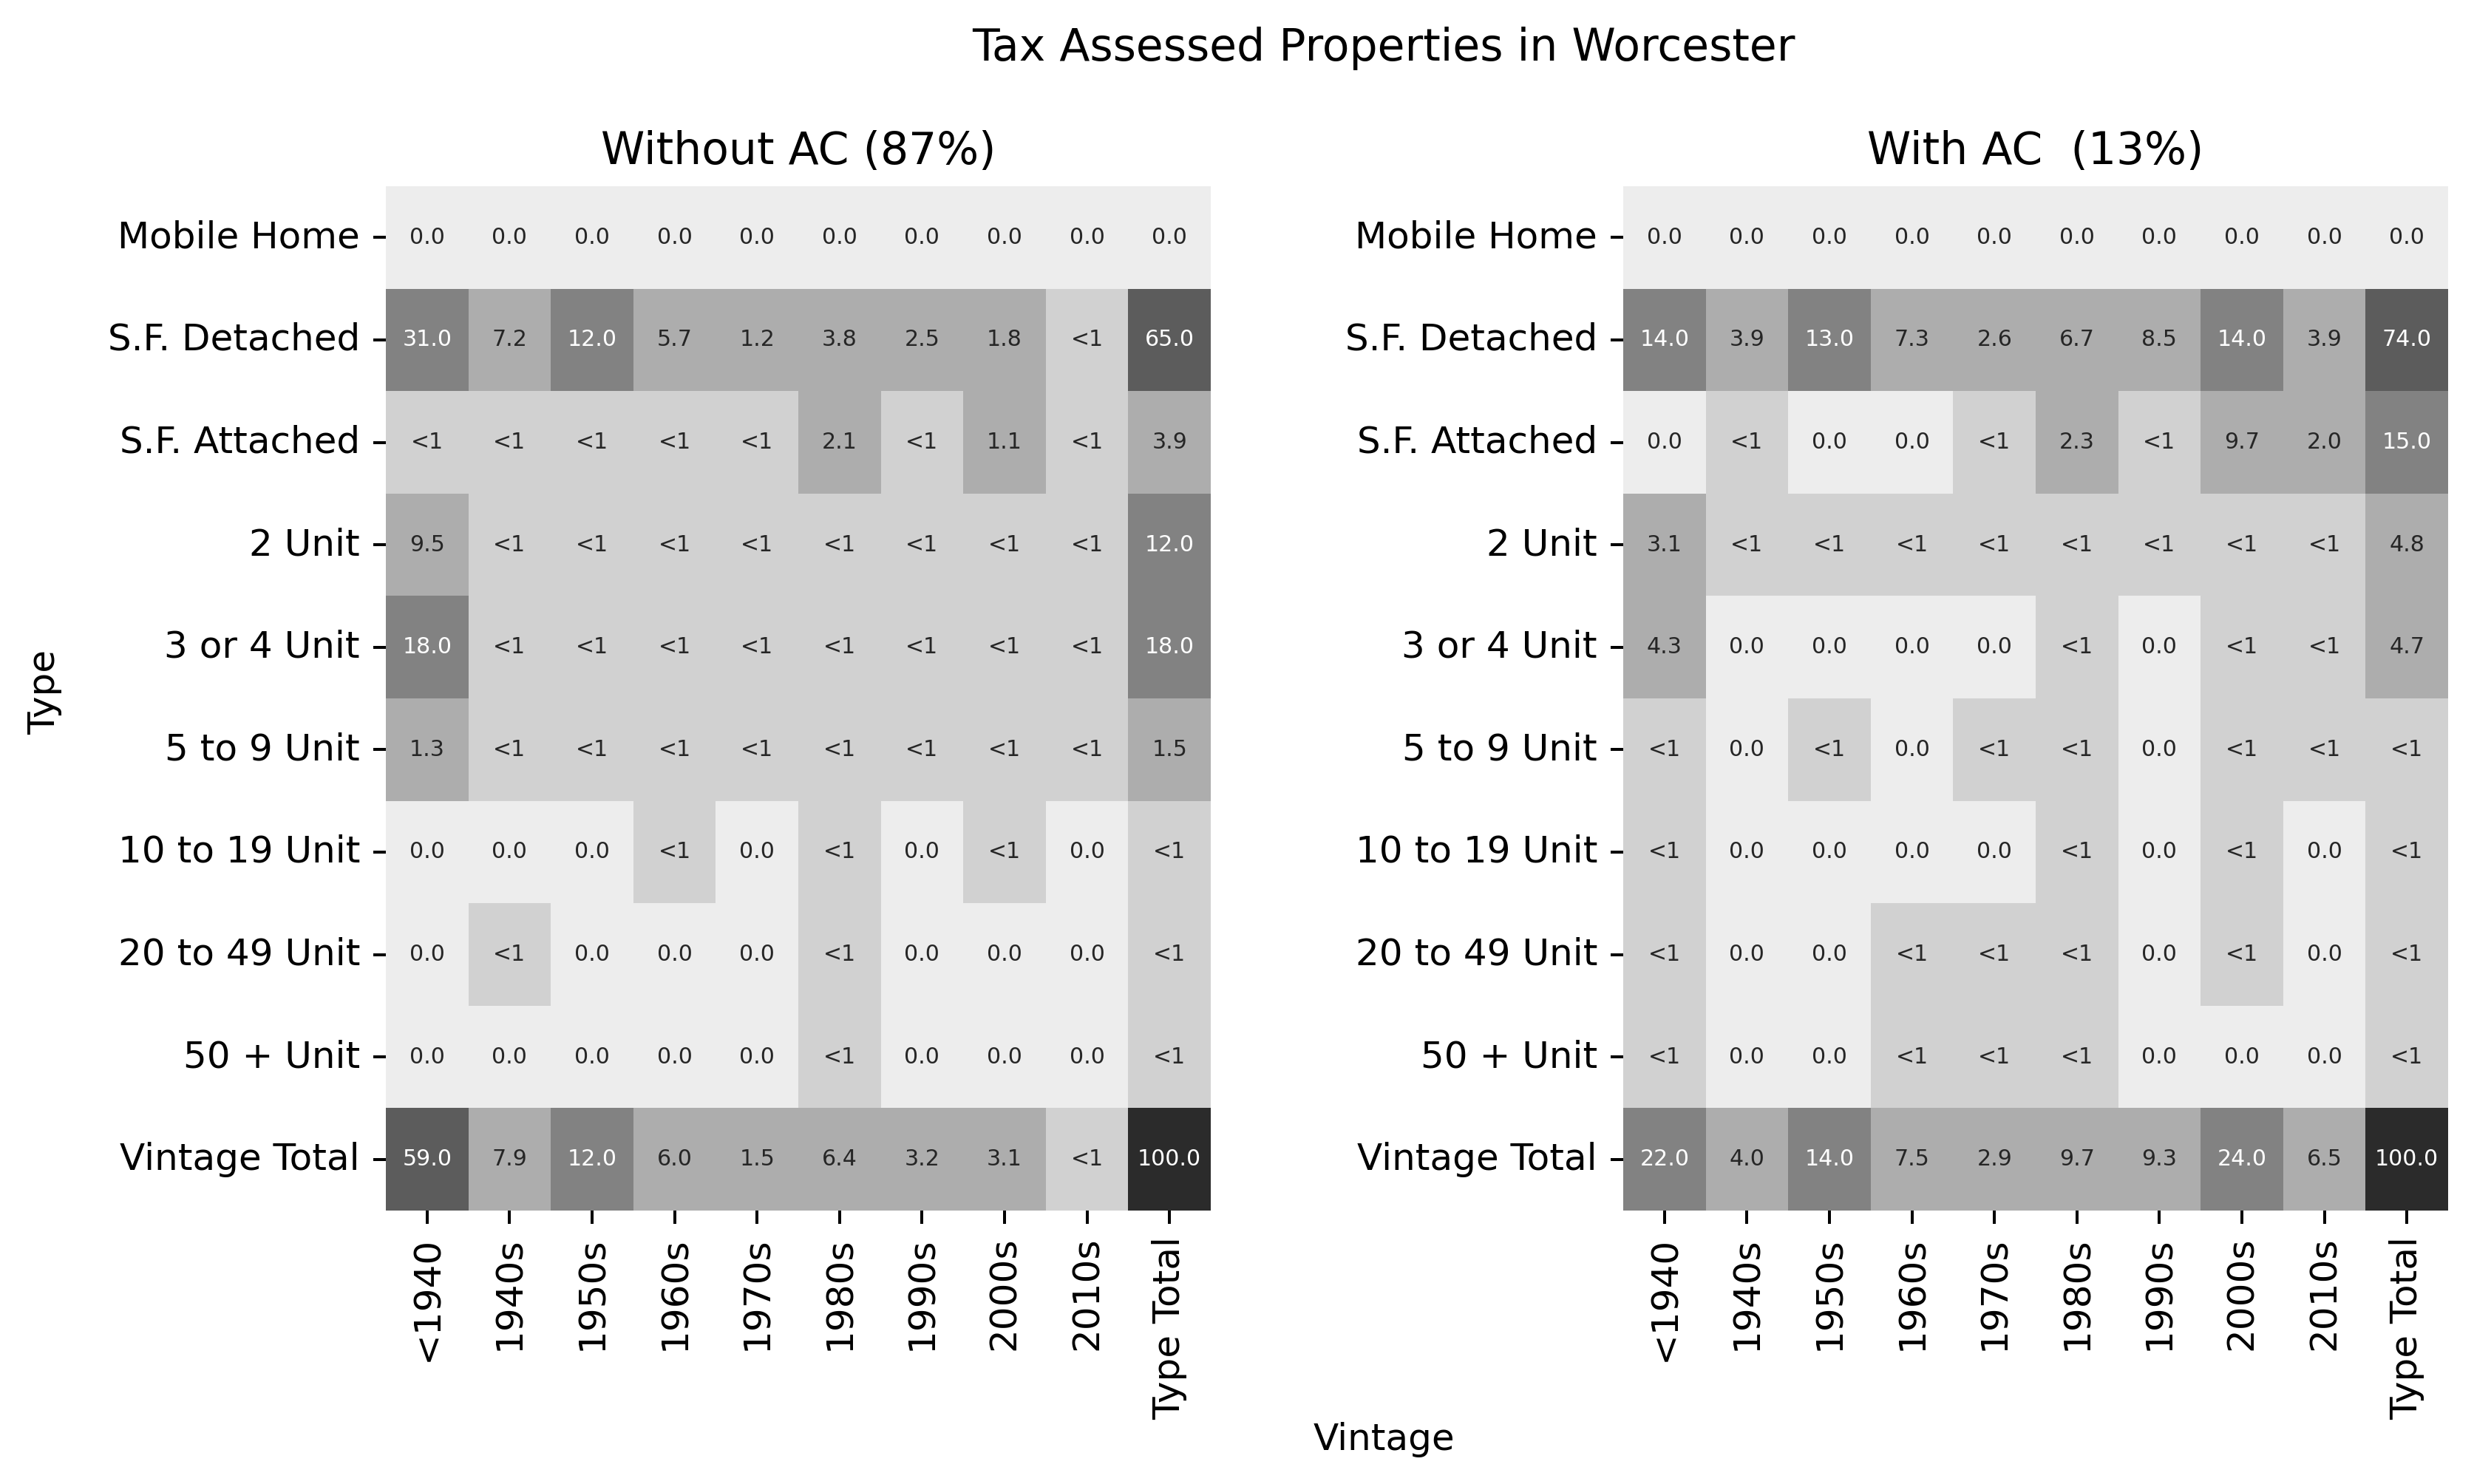

In [18]:
f,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10, 5),dpi=360)
sns.heatmap(no_ac_plot,ax=ax1,cbar=False, annot=True,cmap = cmap, norm=norm)
for t in ax1.texts:
    if float(t.get_text()) > 0 and float(t.get_text()) < 1:
        t.set_text("<1")
    else:
        t.set_text(float(t.get_text()))
    t.set_fontsize(6)
sns.heatmap(ac_plot,ax=ax2,cbar=False, annot=True,cmap = cmap, norm=norm)
for t in ax2.texts:
    if float(t.get_text()) > 0 and float(t.get_text()) < 1:
        t.set_text("<1")
    else:
        t.set_text(float(t.get_text()))
    t.set_fontsize(6)
ax1.title.set_text('Without AC ('+str(round(100*num_no/total_num))+'%)')
ax2.title.set_text('With AC  ('+str(round(100*num_ac/total_num))+'%)')
f.subplots_adjust(wspace = .5)
plt.suptitle('Tax Assessed Properties in Worcester',y=1)
f.text(0.5, -0.07, 'Vintage', ha='center')
f.text(-0.01, 0.5, 'Type', va='center', rotation='vertical')
plt.savefig("Figures/Final/properties_heat.png",bbox_inches = "tight")

In [19]:
# Rename Types to Shorter Styles
metadata.loc[metadata['in.geometry_building_type_acs'] == 'Single-Family Detached','in.geometry_building_type_acs'] = 'S.F. Detached'
metadata.loc[metadata['in.geometry_building_type_acs'] == 'Single-Family Attached','in.geometry_building_type_acs'] = 'S.F. Attached'
metadata.loc[metadata['in.geometry_building_type_acs'] == '50 or more Unit','in.geometry_building_type_acs'] = '50 + Unit'
metadata=metadata.sort_values(by='vintage_ix', ascending=True)
v_ids = metadata['in.vintage'].unique()
metadata=metadata.sort_values(by='type_ix', ascending=True)
t_ids = metadata['in.geometry_building_type_acs'].unique()
nrel_no_ac_plot = pd.DataFrame(index=t_ids,columns=v_ids)
for each_type in t_ids:
    for each_vintage in v_ids:  
        subset = metadata.loc[(metadata['in.vintage']== each_vintage) & (metadata['in.geometry_building_type_acs']== each_type) & (metadata['ac_ix']==0)]
        if len(subset) > 0:
            nrel_no_ac_plot[each_vintage][each_type]=len(subset)
        else:
            nrel_no_ac_plot[each_vintage][each_type]=0

nrel_ac_plot = pd.DataFrame(index=t_ids,columns=v_ids)
for each_type in t_ids:
    for each_vintage in v_ids:  
        subset = metadata.loc[(metadata['in.vintage']== each_vintage) & (metadata['in.geometry_building_type_acs']== each_type) & (metadata['ac_ix']!=0)]
        if len(subset) > 0:
            nrel_ac_plot[each_vintage][each_type]=len(subset)
        else:
            nrel_ac_plot[each_vintage][each_type]=0
# no_ac_plot = no_ac_plot.apply(pd.to_numeric, errors='coerce')
num_no_nrel = nrel_no_ac_plot.sum().sum()
num_ac_nrel = nrel_ac_plot.sum().sum()
total_num_nrel = num_no_nrel +num_ac_nrel
# Turn into a percent
nrel_no_ac_plot=100*(nrel_no_ac_plot/num_no_nrel)
nrel_ac_plot=100*(nrel_ac_plot/num_ac_nrel)
# add total to columns and index
nrel_no_ac_plot['Type Total'] = nrel_no_ac_plot.sum(axis=1)
nrel_ac_plot['Type Total'] = nrel_ac_plot.sum(axis=1)
nrel_no_ac_plot.loc['Vintage Total'] = nrel_no_ac_plot.sum()
nrel_ac_plot.loc['Vintage Total'] = nrel_ac_plot.sum()
nrel_ac_plot = nrel_ac_plot.apply(pd.to_numeric, errors='coerce',downcast='integer')
nrel_no_ac_plot = nrel_no_ac_plot.apply(pd.to_numeric, errors='coerce',downcast='integer')

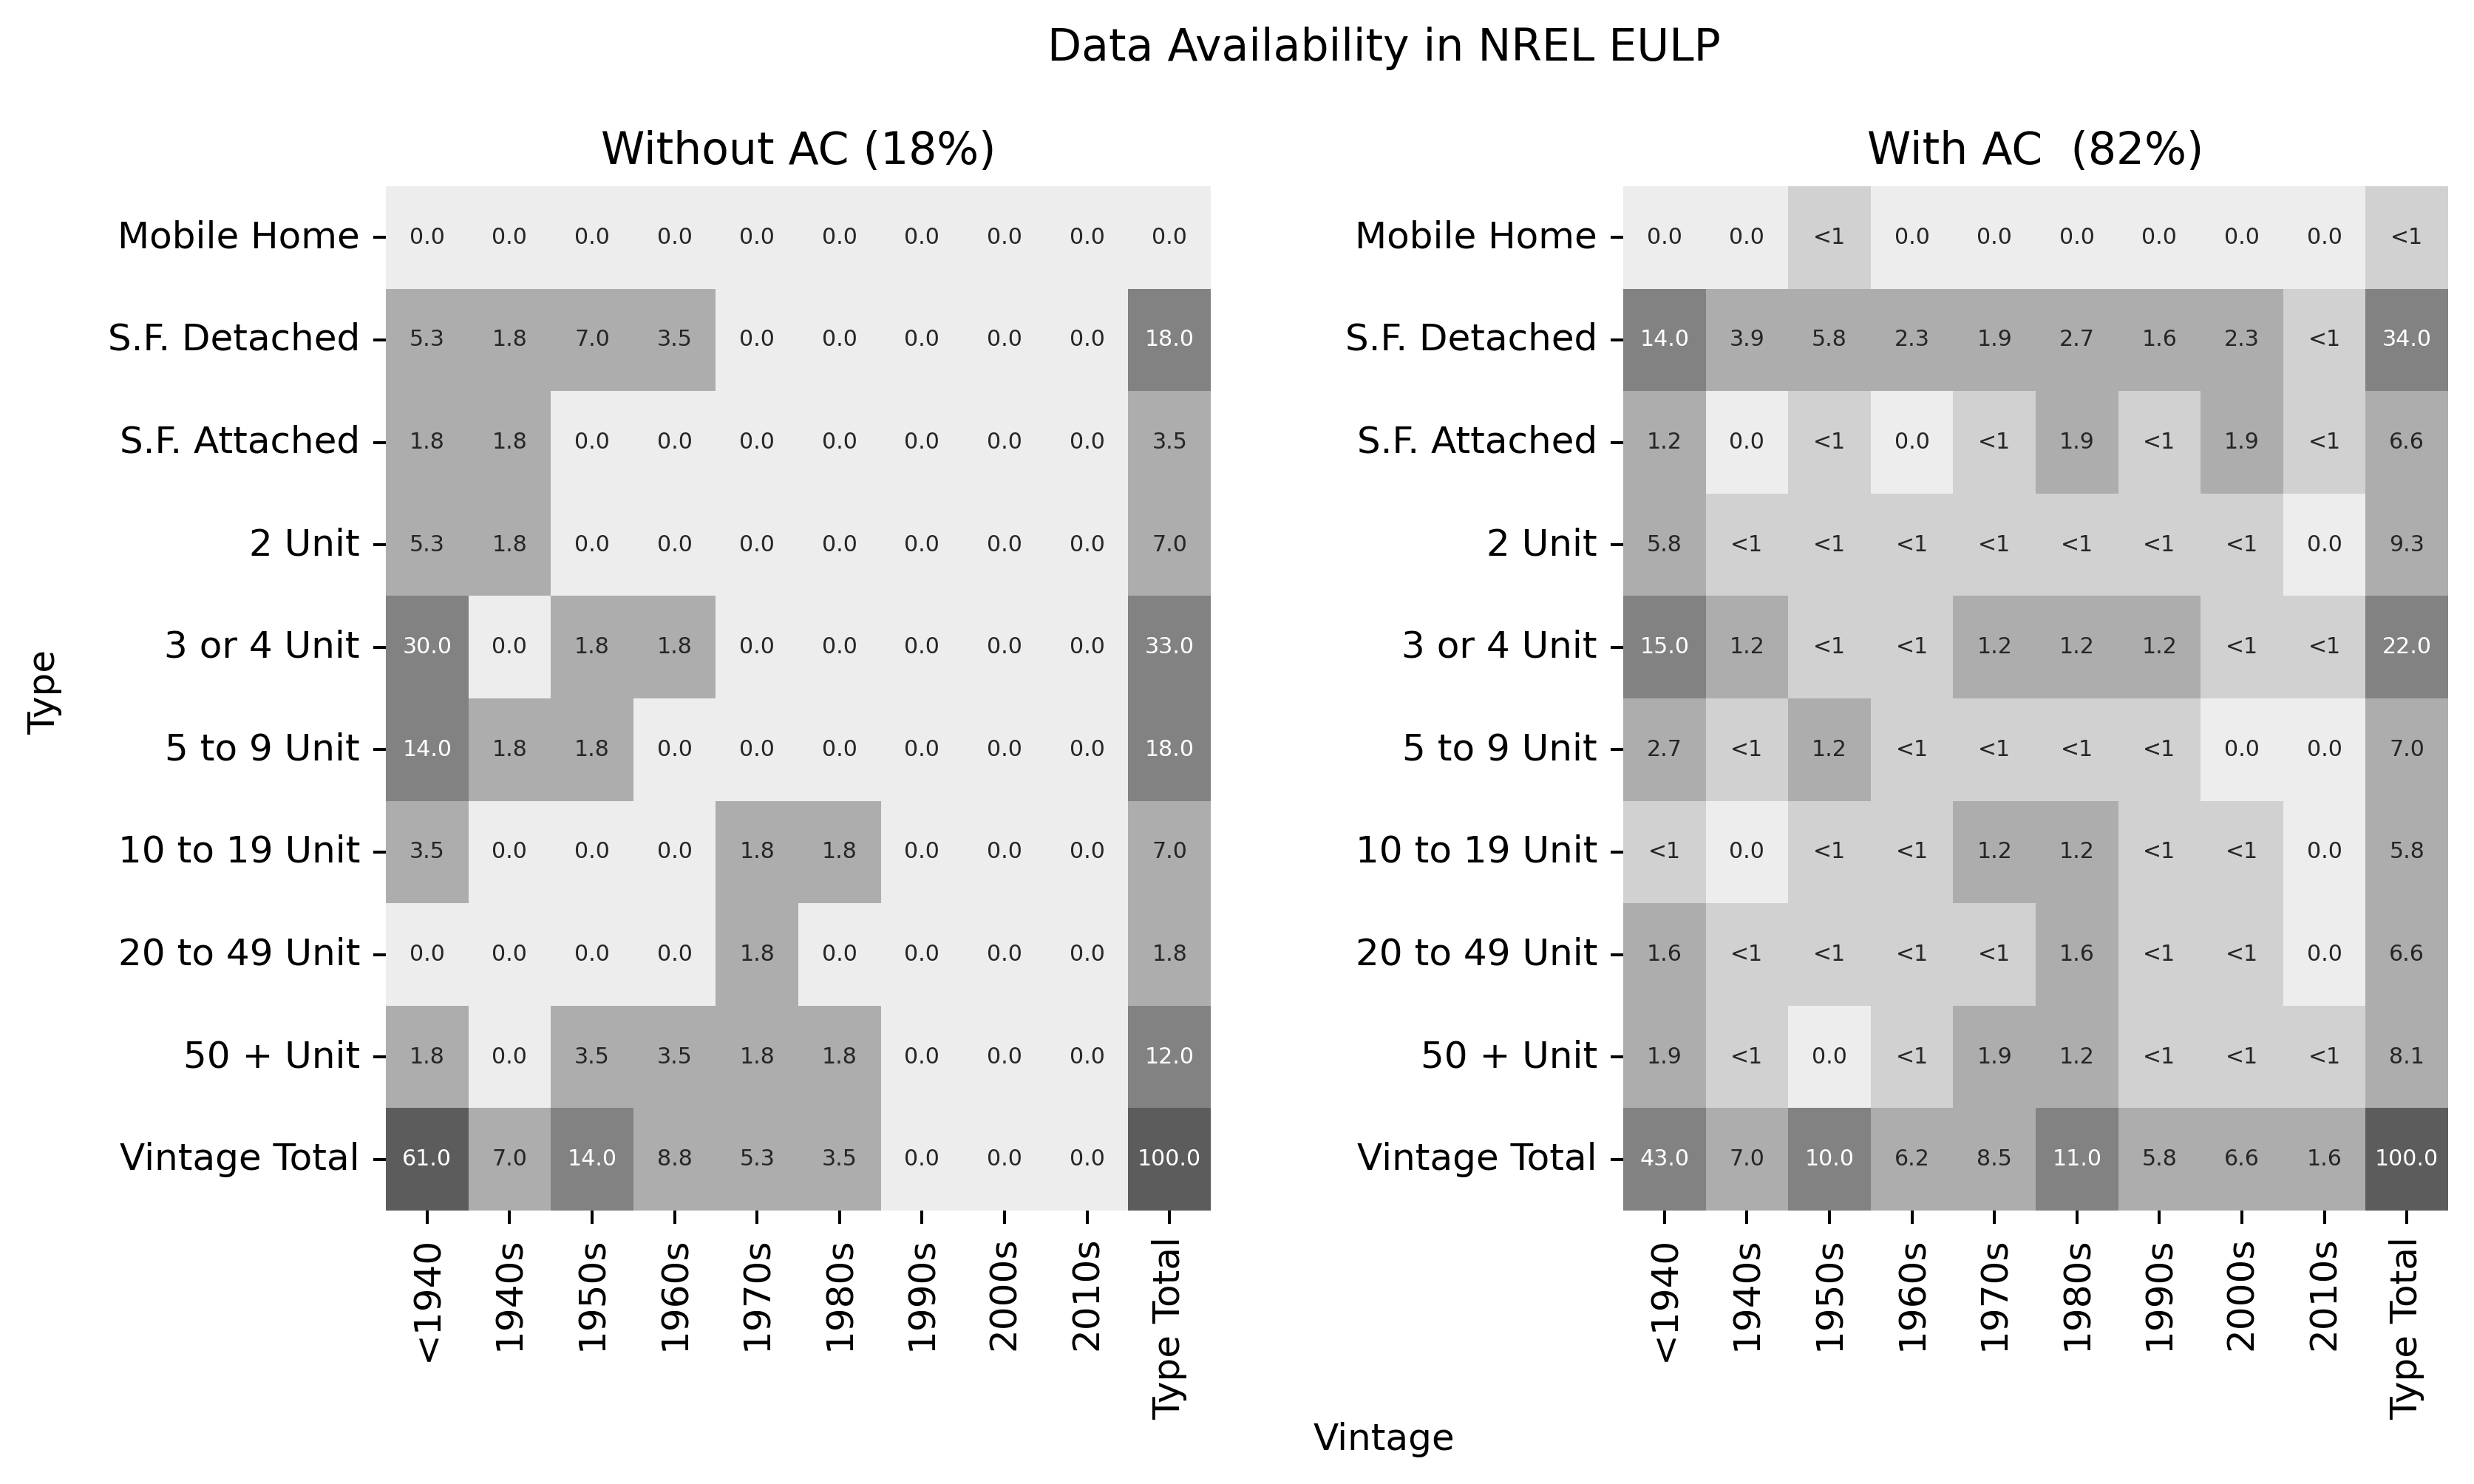

In [20]:
f,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10, 5),dpi=360)
sns.heatmap(nrel_no_ac_plot,ax=ax1,cbar=False, annot=True,cmap = cmap, norm=norm)
sns.heatmap(nrel_ac_plot,ax=ax2,cbar=False, annot=True,cmap = cmap, norm=norm)
ax1.title.set_text('Without AC ('+str(round(100*num_no_nrel/total_num_nrel))+'%)')
ax2.title.set_text('With AC  ('+str(round(100*num_ac_nrel/total_num_nrel))+'%)')
for t in ax1.texts:
    if float(t.get_text()) > 0 and float(t.get_text()) < 1:
        t.set_text("<1")
    else:
        t.set_text(float(t.get_text()))
    t.set_fontsize(6)
for t in ax2.texts:
    if float(t.get_text()) > 0 and float(t.get_text()) < 1:
        t.set_text("<1")
    else:
        t.set_text(float(t.get_text()))
    t.set_fontsize(6)
f.subplots_adjust(wspace = .5)
plt.suptitle('Data Availability in NREL EULP',y=1)
f.text(0.5, -0.07, 'Vintage', ha='center')
f.text(-0.01, 0.5, 'Type', va='center', rotation='vertical')
plt.savefig("Figures/Final/nrel_heat.png",bbox_inches = "tight")

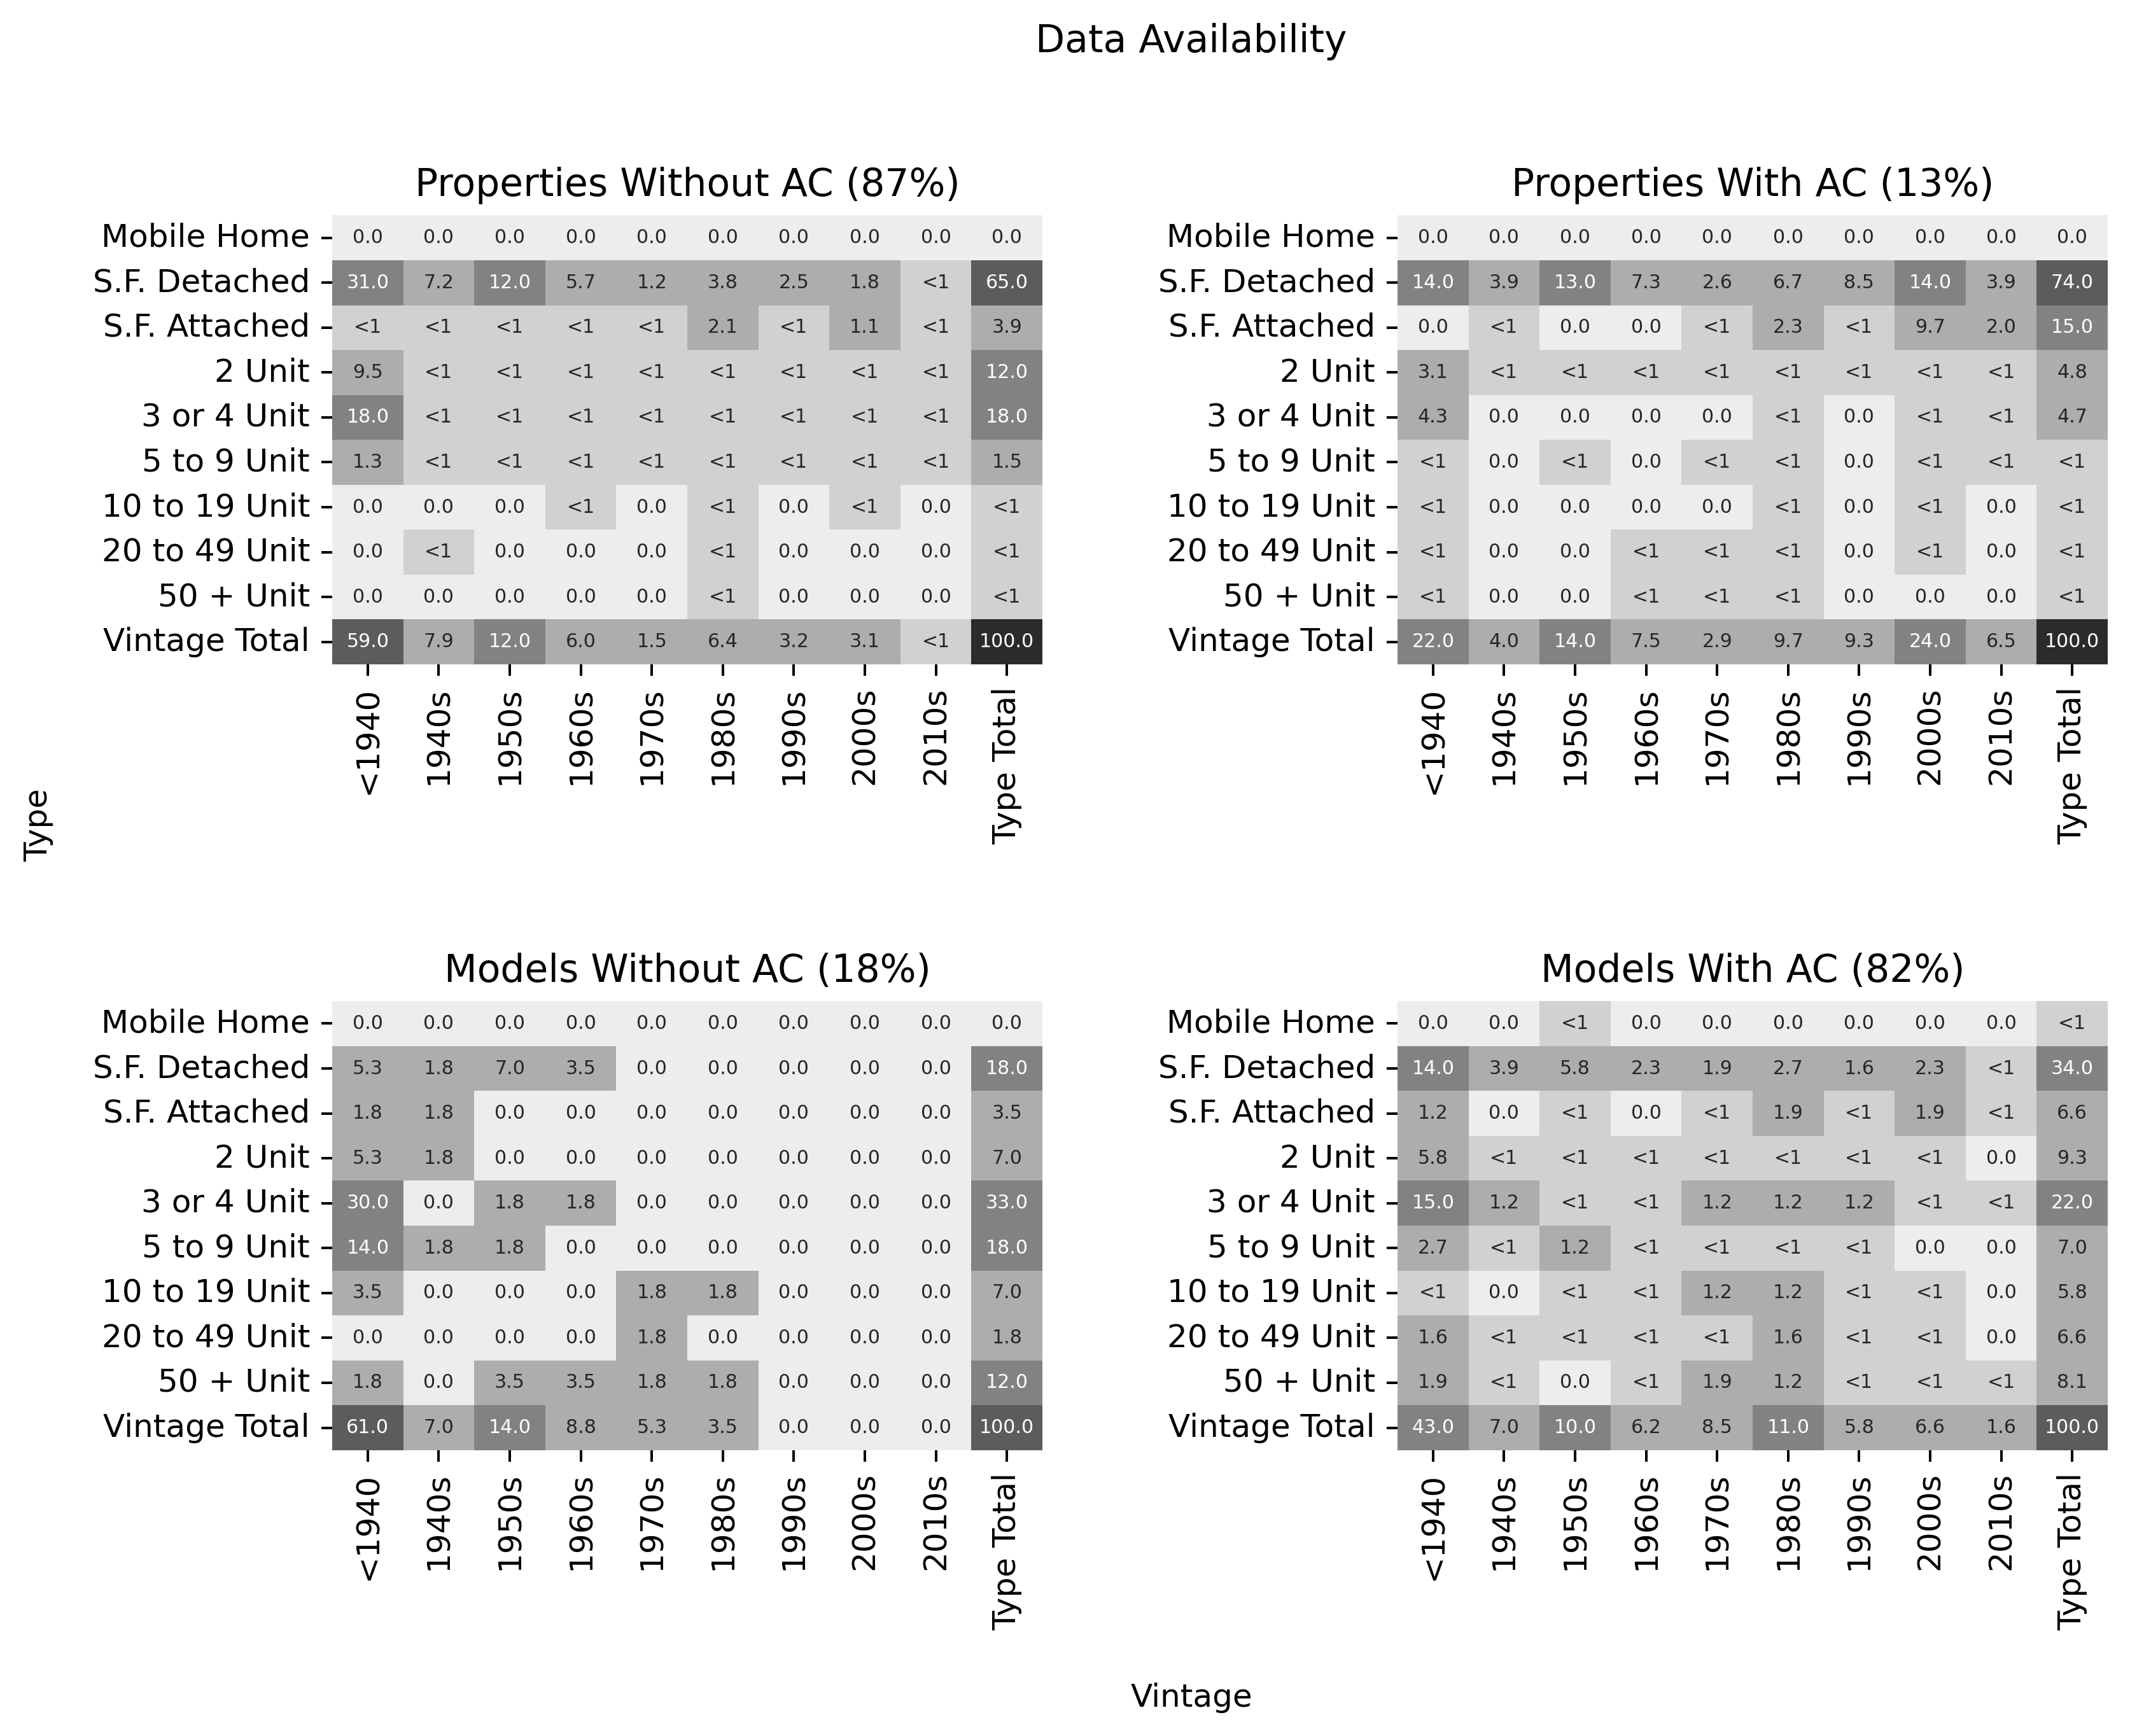

In [21]:
f,axs = plt.subplots(nrows=2,ncols=2,figsize=(10, 7),dpi=360)#,sharex=True,sharey=True)
sns.heatmap(no_ac_plot,ax=axs[0,0],cbar=False, annot=True,cmap = cmap, norm=norm)
sns.heatmap(ac_plot,cbar=False, ax=axs[0,1],annot=True,cmap = cmap, norm=norm)
sns.heatmap(nrel_no_ac_plot,ax=axs[1,0],cbar=False, annot=True,cmap = cmap, norm=norm)
sns.heatmap(nrel_ac_plot,ax=axs[1,1],cbar=False, annot=True,cmap = cmap, norm=norm)
for t in axs[0,0].texts:
    if float(t.get_text()) > 0 and float(t.get_text()) < 1:
        t.set_text("<1")
    else:
        t.set_text(float(t.get_text()))
    t.set_fontsize(6)
for t in axs[0,1].texts:
    if float(t.get_text()) > 0 and float(t.get_text()) < 1:
        t.set_text("<1")
    else:
        t.set_text(float(t.get_text()))
    t.set_fontsize(6)
for t in axs[1,0].texts:
    if float(t.get_text()) > 0 and float(t.get_text()) < 1:
        t.set_text("<1")
    else:
        t.set_text(float(t.get_text()))
    t.set_fontsize(6)
for t in axs[1,1].texts:
    if float(t.get_text()) > 0 and float(t.get_text()) < 1:
        t.set_text("<1")
    else:
        t.set_text(float(t.get_text()))
    t.set_fontsize(6)
axs[0,0].title.set_text('Properties Without AC ('+str(round(100*num_no/total_num))+'%)')
axs[0,1].title.set_text('Properties With AC ('+str(round(100*num_ac/total_num))+'%)')
axs[1,0].title.set_text('Models Without AC ('+str(round(100*num_no_nrel/total_num_nrel))+'%)')
axs[1,1].title.set_text('Models With AC ('+str(round(100*num_ac_nrel/total_num_nrel))+'%)')
f.subplots_adjust(wspace = .5,hspace=.75)
f.suptitle('Data Availability',y=1)
f.text(0.5, -0.05, 'Vintage', ha='center')
f.text(-0.01, 0.5, 'Type', va='center', rotation='vertical')

plt.savefig("Figures/Final/both_heat.png",bbox_inches = "tight")

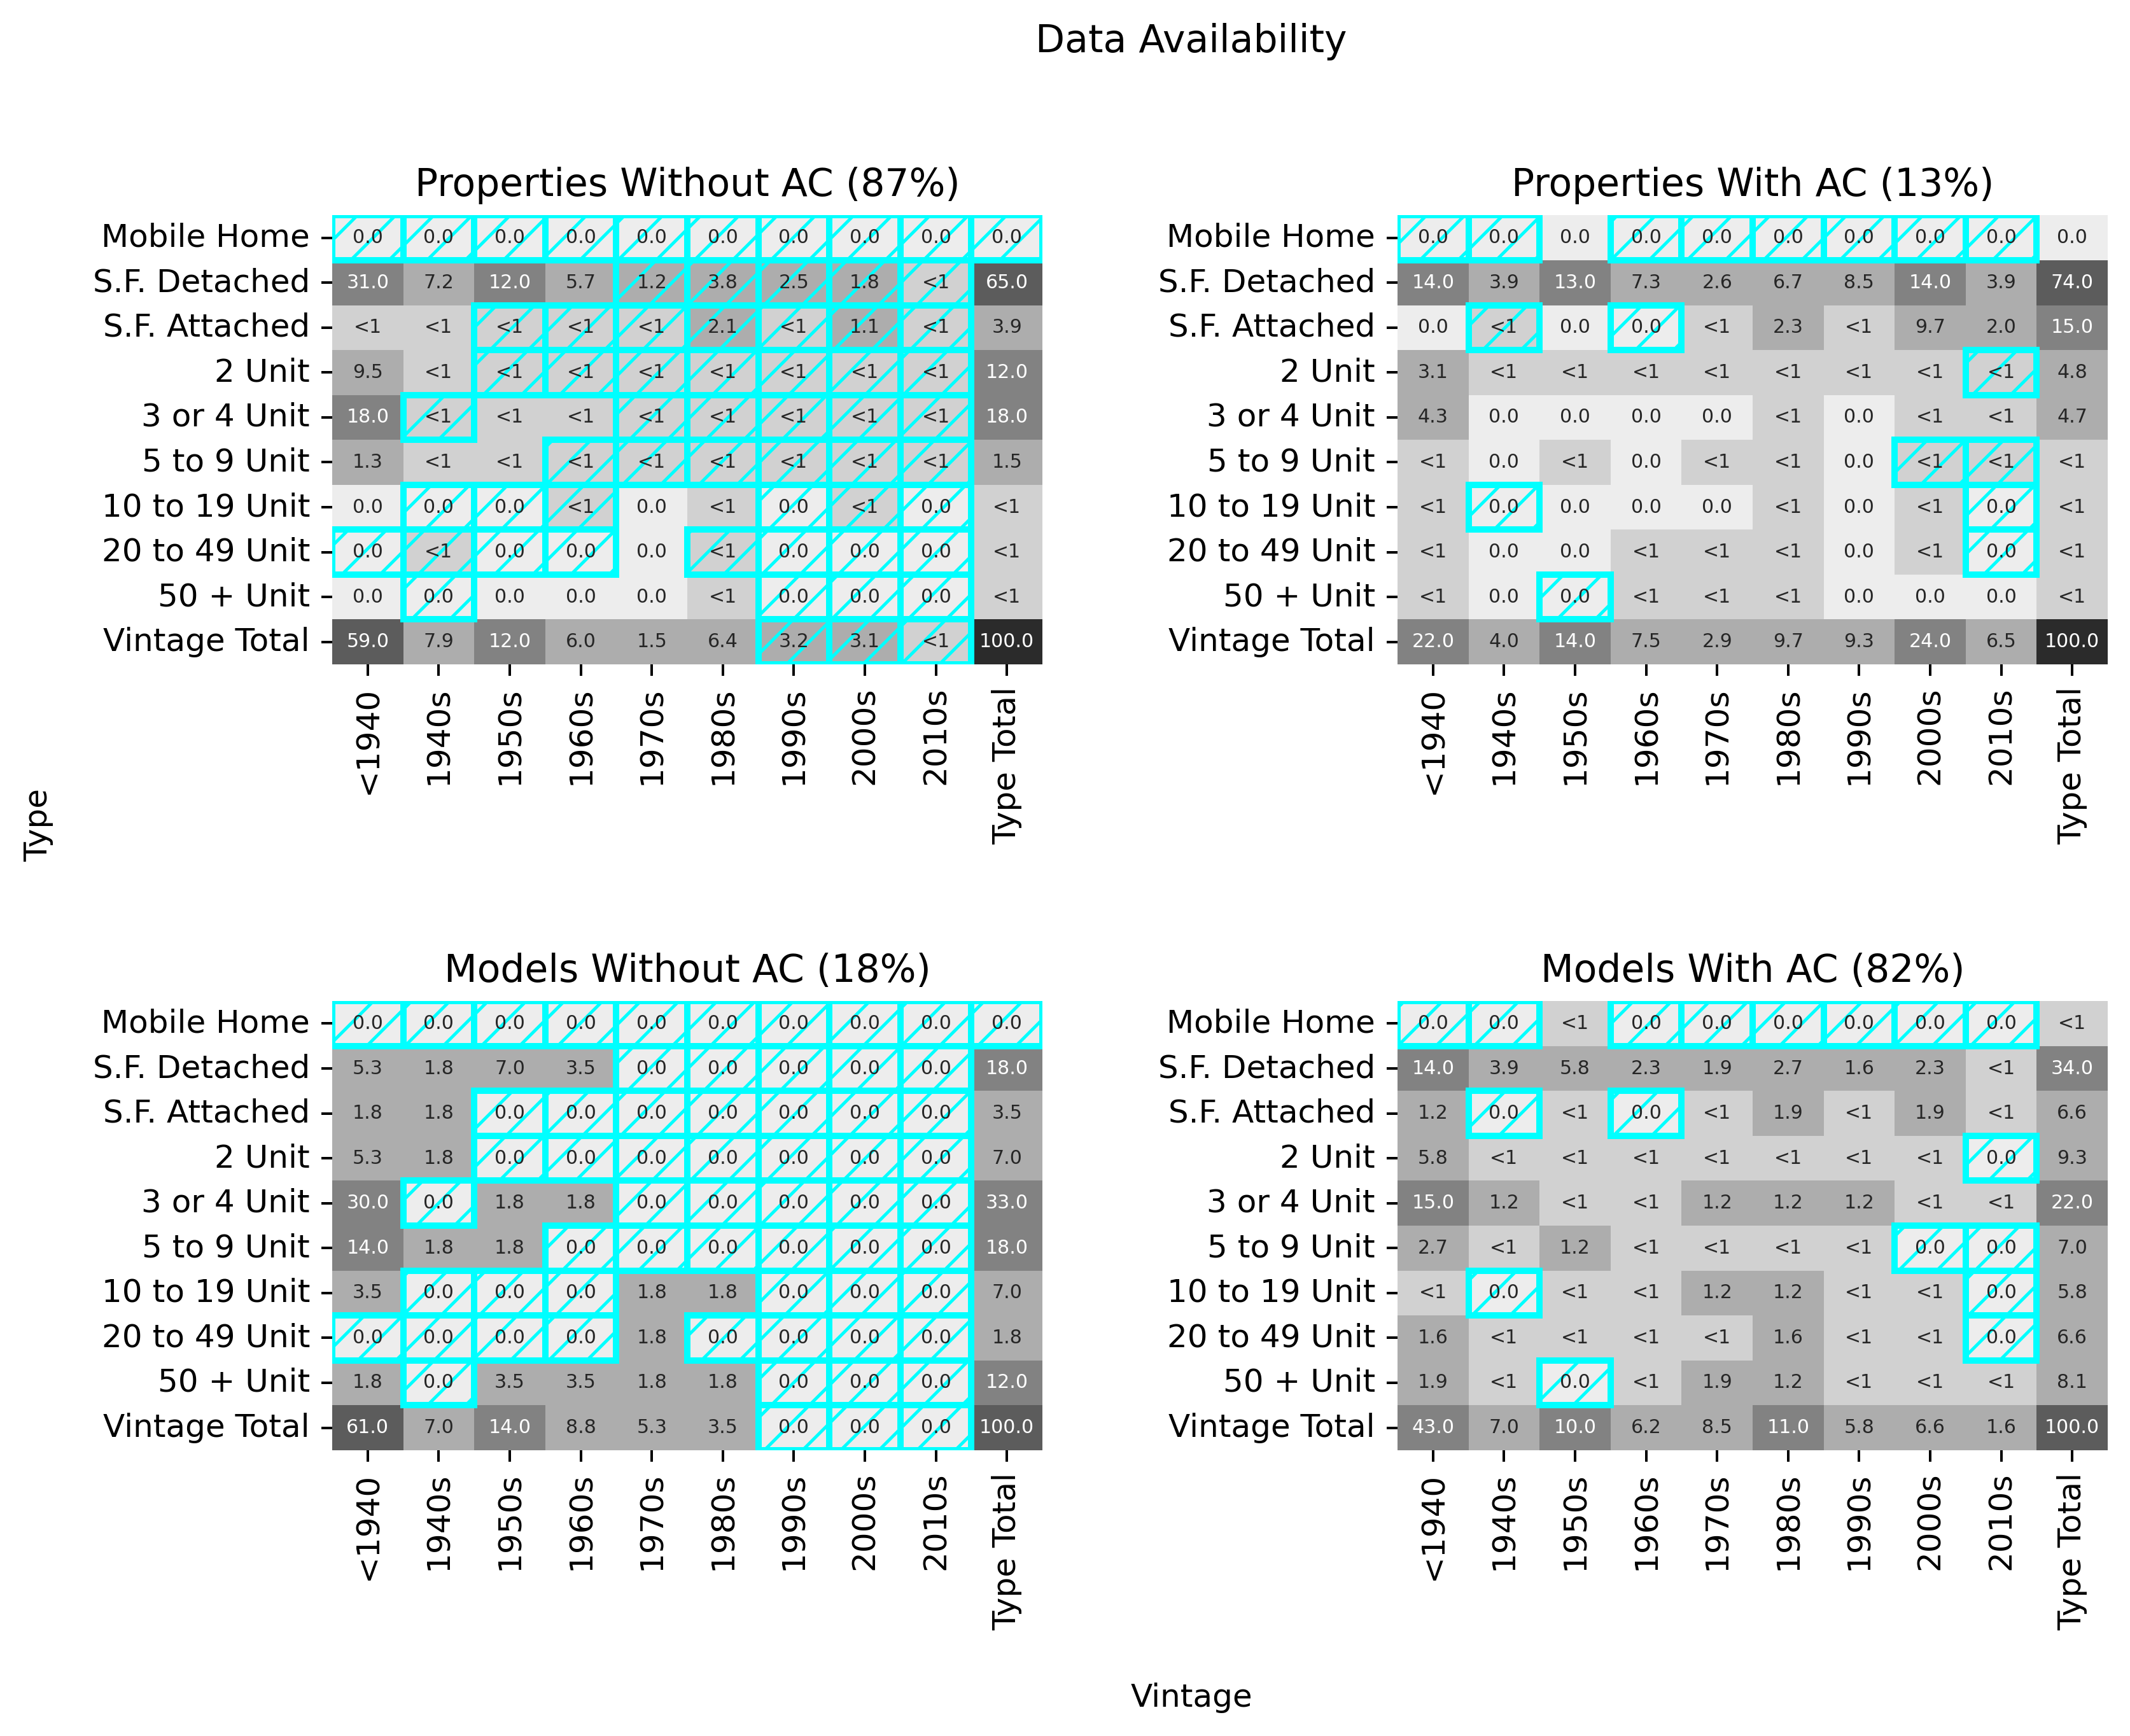

In [22]:
f,axs = plt.subplots(nrows=2,ncols=2,figsize=(10, 7),dpi=360)#,sharex=True,sharey=True)
sns.heatmap(no_ac_plot,ax=axs[0,0],cbar=False, annot=True,cmap = cmap, norm=norm)
sns.heatmap(ac_plot,cbar=False, ax=axs[0,1],annot=True,cmap = cmap, norm=norm)
sns.heatmap(nrel_no_ac_plot,ax=axs[1,0],cbar=False, annot=True,cmap = cmap, norm=norm)
sns.heatmap(nrel_ac_plot,ax=axs[1,1],cbar=False, annot=True,cmap = cmap, norm=norm)
for t in axs[0,0].texts:
    if float(t.get_text()) > 0 and float(t.get_text()) < 1:
        t.set_text("<1")
    else:
        t.set_text(float(t.get_text()))
    t.set_fontsize(6)
for t in axs[0,1].texts:
    if float(t.get_text()) > 0 and float(t.get_text()) < 1:
        t.set_text("<1")
    else:
        t.set_text(float(t.get_text()))
    t.set_fontsize(6)
for t in axs[1,0].texts:
    if float(t.get_text()) > 0 and float(t.get_text()) < 1:
        t.set_text("<1")
    else:
        t.set_text(float(t.get_text()))
    t.set_fontsize(6)
for t in axs[1,1].texts:
    if float(t.get_text()) > 0 and float(t.get_text()) < 1:
        t.set_text("<1")
    else:
        t.set_text(float(t.get_text()))
    t.set_fontsize(6)

for i, each_vintage in enumerate(nrel_no_ac_plot.columns):
    for j, each_type in enumerate(nrel_no_ac_plot.index):
        if nrel_no_ac_plot.iloc[j, i] == 0:
            rect = Rectangle((i, j), 1, 1, ec='cyan', fc='none', lw=2, hatch='//')
            rect2 = Rectangle((i, j), 1, 1, ec='cyan', fc='none', lw=2, hatch='//')

            axs[1,0].add_patch(rect)
            axs[0,0].add_patch(rect2)
            
for i, each_vintage in enumerate(nrel_ac_plot.columns):
    for j, each_type in enumerate(nrel_ac_plot.index):
        if nrel_ac_plot.iloc[j, i] == 0:
            rect = Rectangle((i, j), 1, 1, ec='cyan', fc='none', lw=2, hatch='//')
            rect2 = Rectangle((i, j), 1, 1, ec='cyan', fc='none', lw=2, hatch='//')

            axs[1,1].add_patch(rect)
            axs[0,1].add_patch(rect2)
            
axs[0,0].title.set_text('Properties Without AC ('+str(round(100*num_no/total_num))+'%)')
axs[0,1].title.set_text('Properties With AC ('+str(round(100*num_ac/total_num))+'%)')
axs[1,0].title.set_text('Models Without AC ('+str(round(100*num_no_nrel/total_num_nrel))+'%)')
axs[1,1].title.set_text('Models With AC ('+str(round(100*num_ac_nrel/total_num_nrel))+'%)')
f.subplots_adjust(wspace = .5,hspace=.75)
f.suptitle('Data Availability',y=1)
f.text(0.5, -0.05, 'Vintage', ha='center')
f.text(-0.01, 0.5, 'Type', va='center', rotation='vertical')

plt.savefig("Figures/Final/both_heat_patches.png",bbox_inches = "tight")

In [23]:
parcel_plot = pd.DataFrame(index=styles,columns=vintage)
nrel_plot = pd.DataFrame(index=styles,columns=vintage)

for each_type in t_ids:
    for each_vintage in v_ids:  
        subset = matched_parcels.loc[(matched_parcels['vintage']==each_vintage) & (matched_parcels['style_type'] == each_type)]
        if subset.empty is False:
            parcel_plot[each_vintage][each_type]=len(subset)
        else:
            parcel_plot[each_vintage][each_type]=0
        subset = metadata.loc[(metadata['in.vintage']== each_vintage) & (metadata['in.geometry_building_type_acs']== each_type)]
        if len(subset) > 0:
            nrel_plot[each_vintage][each_type]=len(subset)
        else:
            nrel_plot[each_vintage][each_type]=0
# Turn into a percent
num_nrel = nrel_plot.sum().sum()
num_parcel = parcel_plot.sum().sum()
nrel_plot=100*(nrel_plot/num_nrel)
parcel_plot=100*(parcel_plot/num_parcel)
# add total to columns and index
nrel_plot['Type Total'] = nrel_plot.sum(axis=1)
parcel_plot['Type Total'] = parcel_plot.sum(axis=1)
nrel_plot.loc['Vintage Total'] = nrel_plot.sum()
parcel_plot.loc['Vintage Total'] = parcel_plot.sum()
nrel_plot = nrel_plot.apply(pd.to_numeric, errors='coerce',downcast='integer')
parcel_plot = parcel_plot.apply(pd.to_numeric, errors='coerce',downcast='integer')        

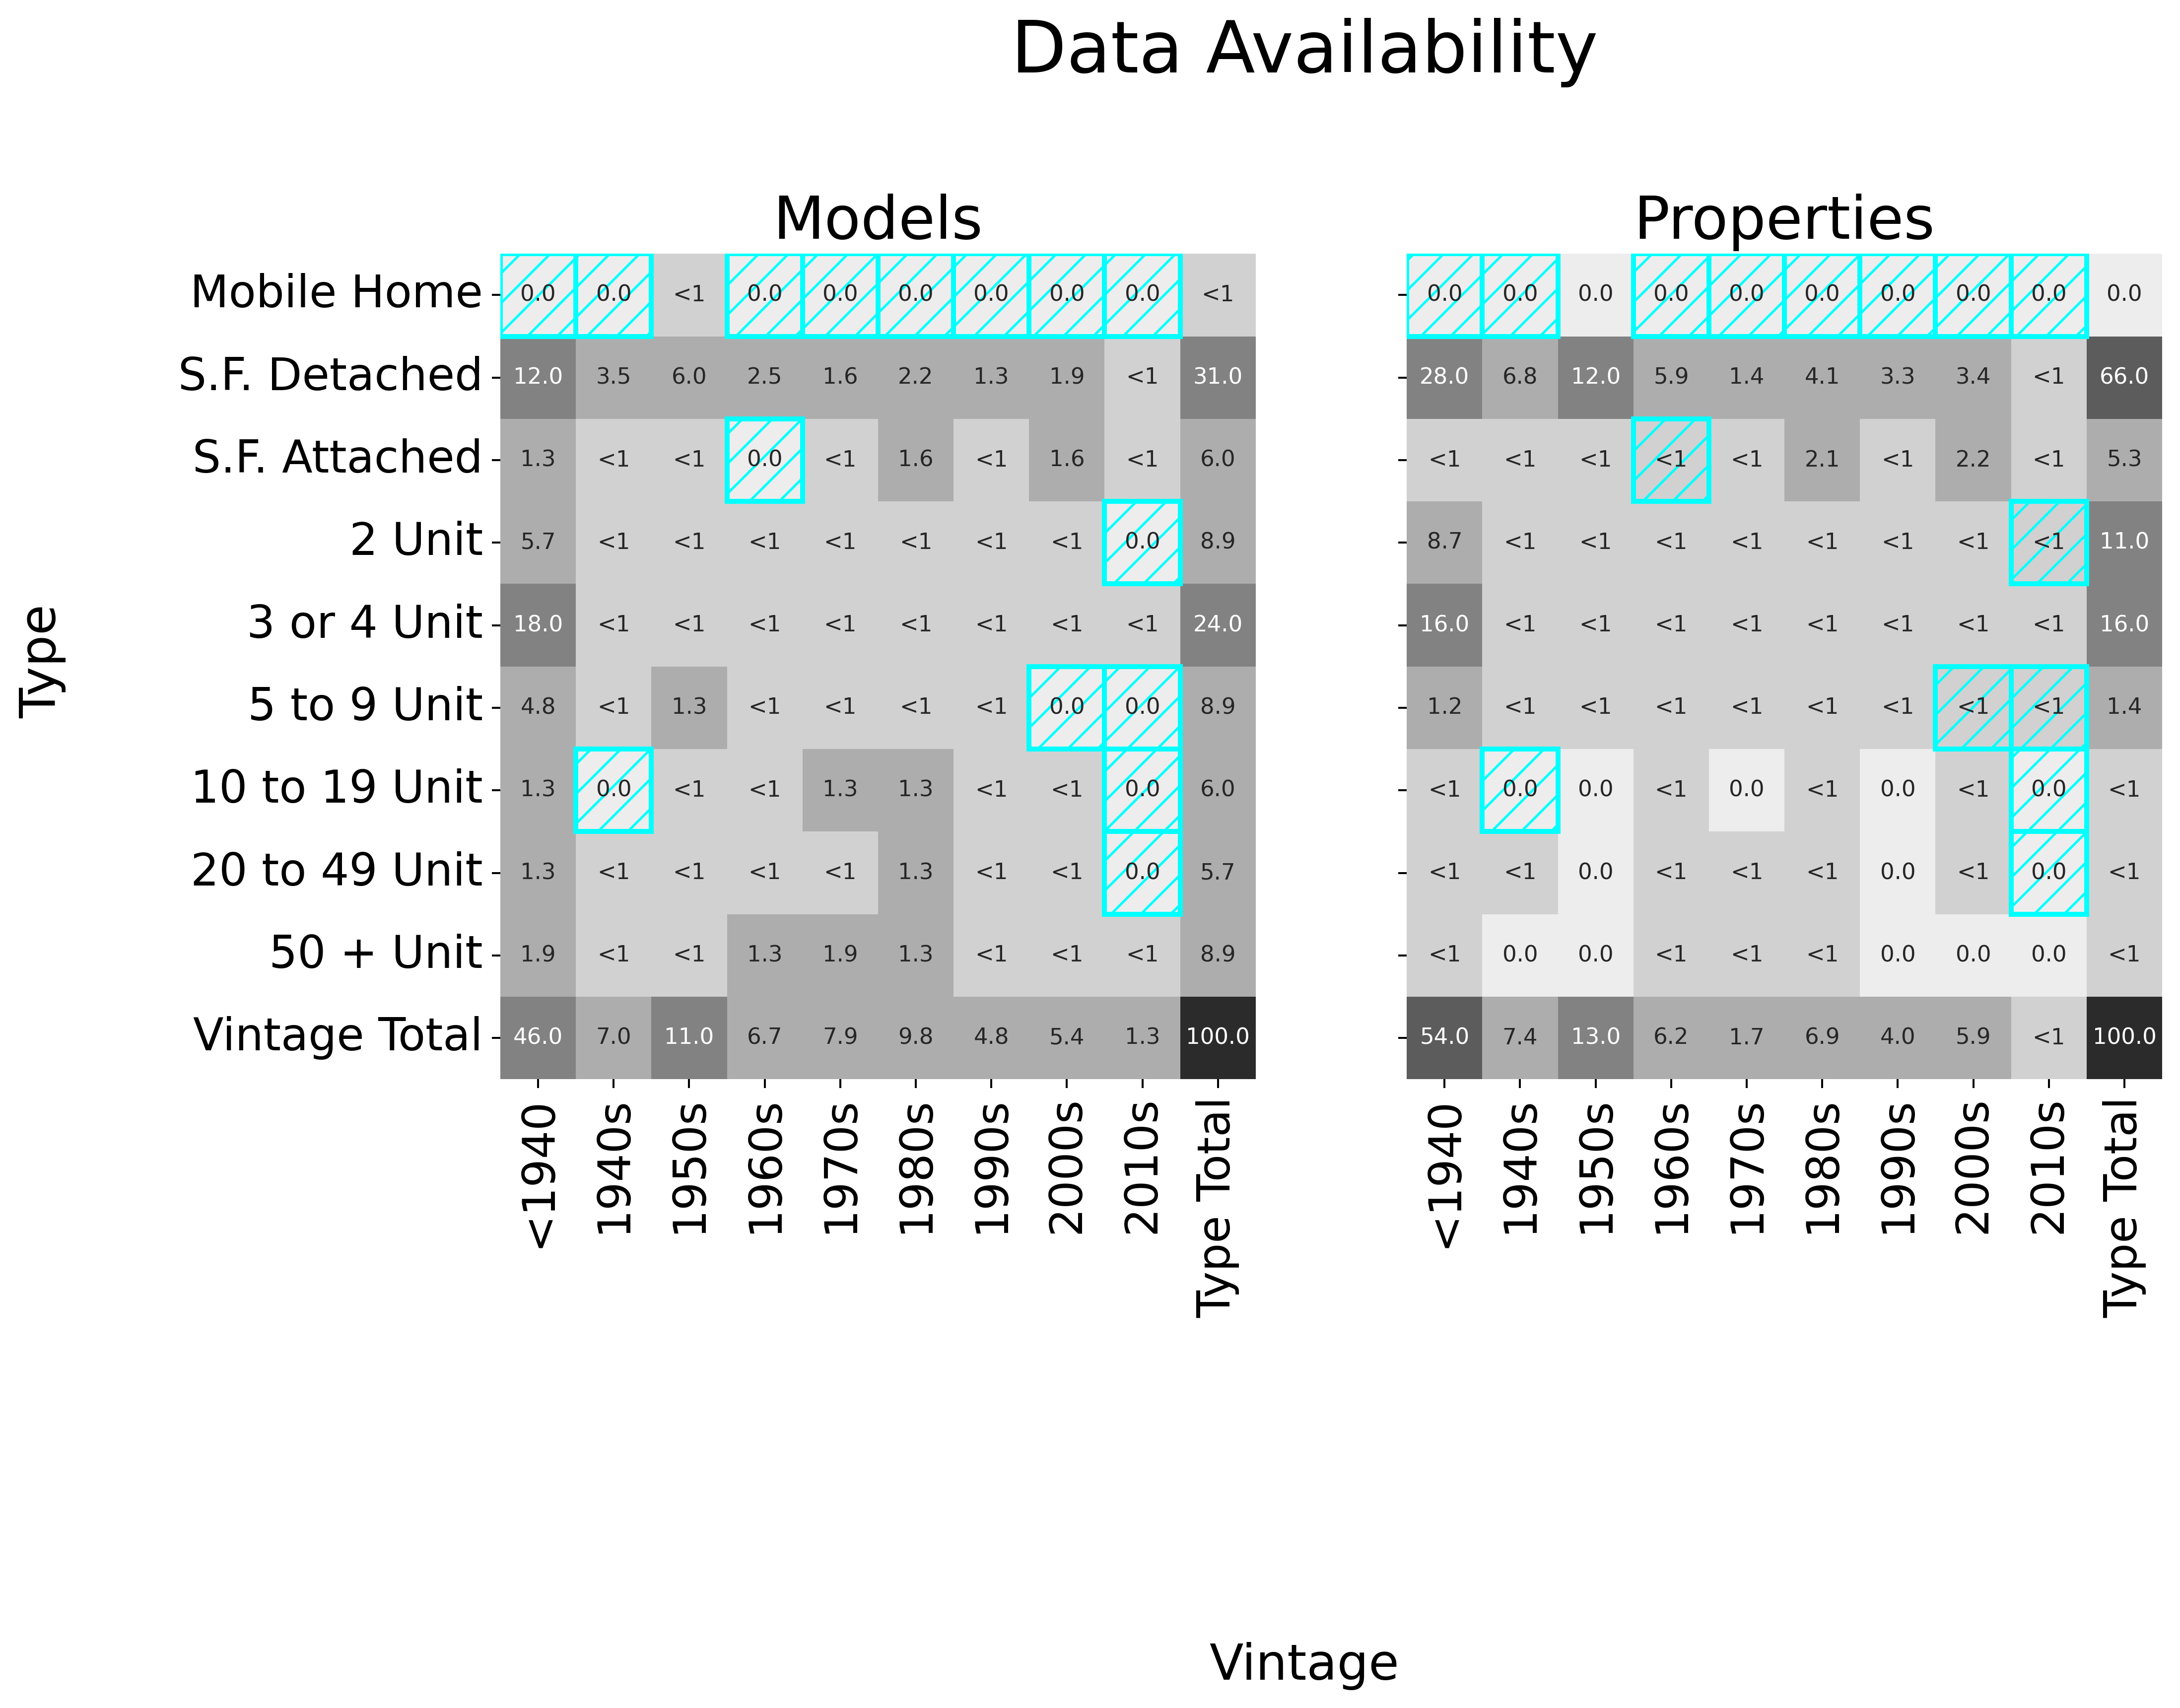

In [24]:
colors = sns.color_palette('Greys', 6)
levels = [0, .000001,1, 10, 50, 100.0]
cmap, norm = mpl.colors.from_levels_and_colors(levels, colors, extend="max")

f,axs = plt.subplots(nrows=1,ncols=2,figsize=(12, 6),dpi=360,sharex=True,sharey=True)
sns.heatmap(nrel_plot,ax=axs[0],cbar=False, annot=True,cmap = cmap, norm=norm)
axs[0].title.set_text('Models')
axs[0].title.set_size(24)
for t in axs[0].texts:
    if float(t.get_text()) > 0 and float(t.get_text()) < 1:
        t.set_text("<1")
    else:
        t.set_text(float(t.get_text()))
    t.set_fontsize(9)
            
sns.heatmap(parcel_plot,cbar=False, ax=axs[1],annot=True,cmap = cmap, norm=norm)
axs[1].title.set_text('Properties')
axs[1].title.set_size(24)
for t in axs[1].texts:
    if float(t.get_text()) > 0 and float(t.get_text()) < 1:
        t.set_text("<1")
    else:
        t.set_text(float(t.get_text()))
    t.set_fontsize(9)

for i, each_vintage in enumerate(nrel_plot.columns):
    for j, each_type in enumerate(nrel_plot.index):
        if nrel_plot.iloc[j, i] == 0:
            rect = Rectangle((i, j), 1, 1, ec='cyan', fc='none', lw=2, hatch='//')
            rect2 = Rectangle((i, j), 1, 1, ec='cyan', fc='none', lw=2, hatch='//')

            axs[0].add_patch(rect)
            axs[1].add_patch(rect2)
            
# f.subplots_adjust(,hspace=.75)
f.suptitle('Data Availability',y=1.1,fontsize=29)
f.text(0.5, -0.45, 'Vintage', ha='center',fontsize=20)
f.text(-0.1, 0.5, 'Type', va='center', rotation='vertical',fontsize=20)
axs[0].tick_params(axis='both', labelsize=18)
axs[1].tick_params(axis='both', labelsize=18)
plt.savefig("Figures/Final/dataavailability.png",bbox_inches = "tight")

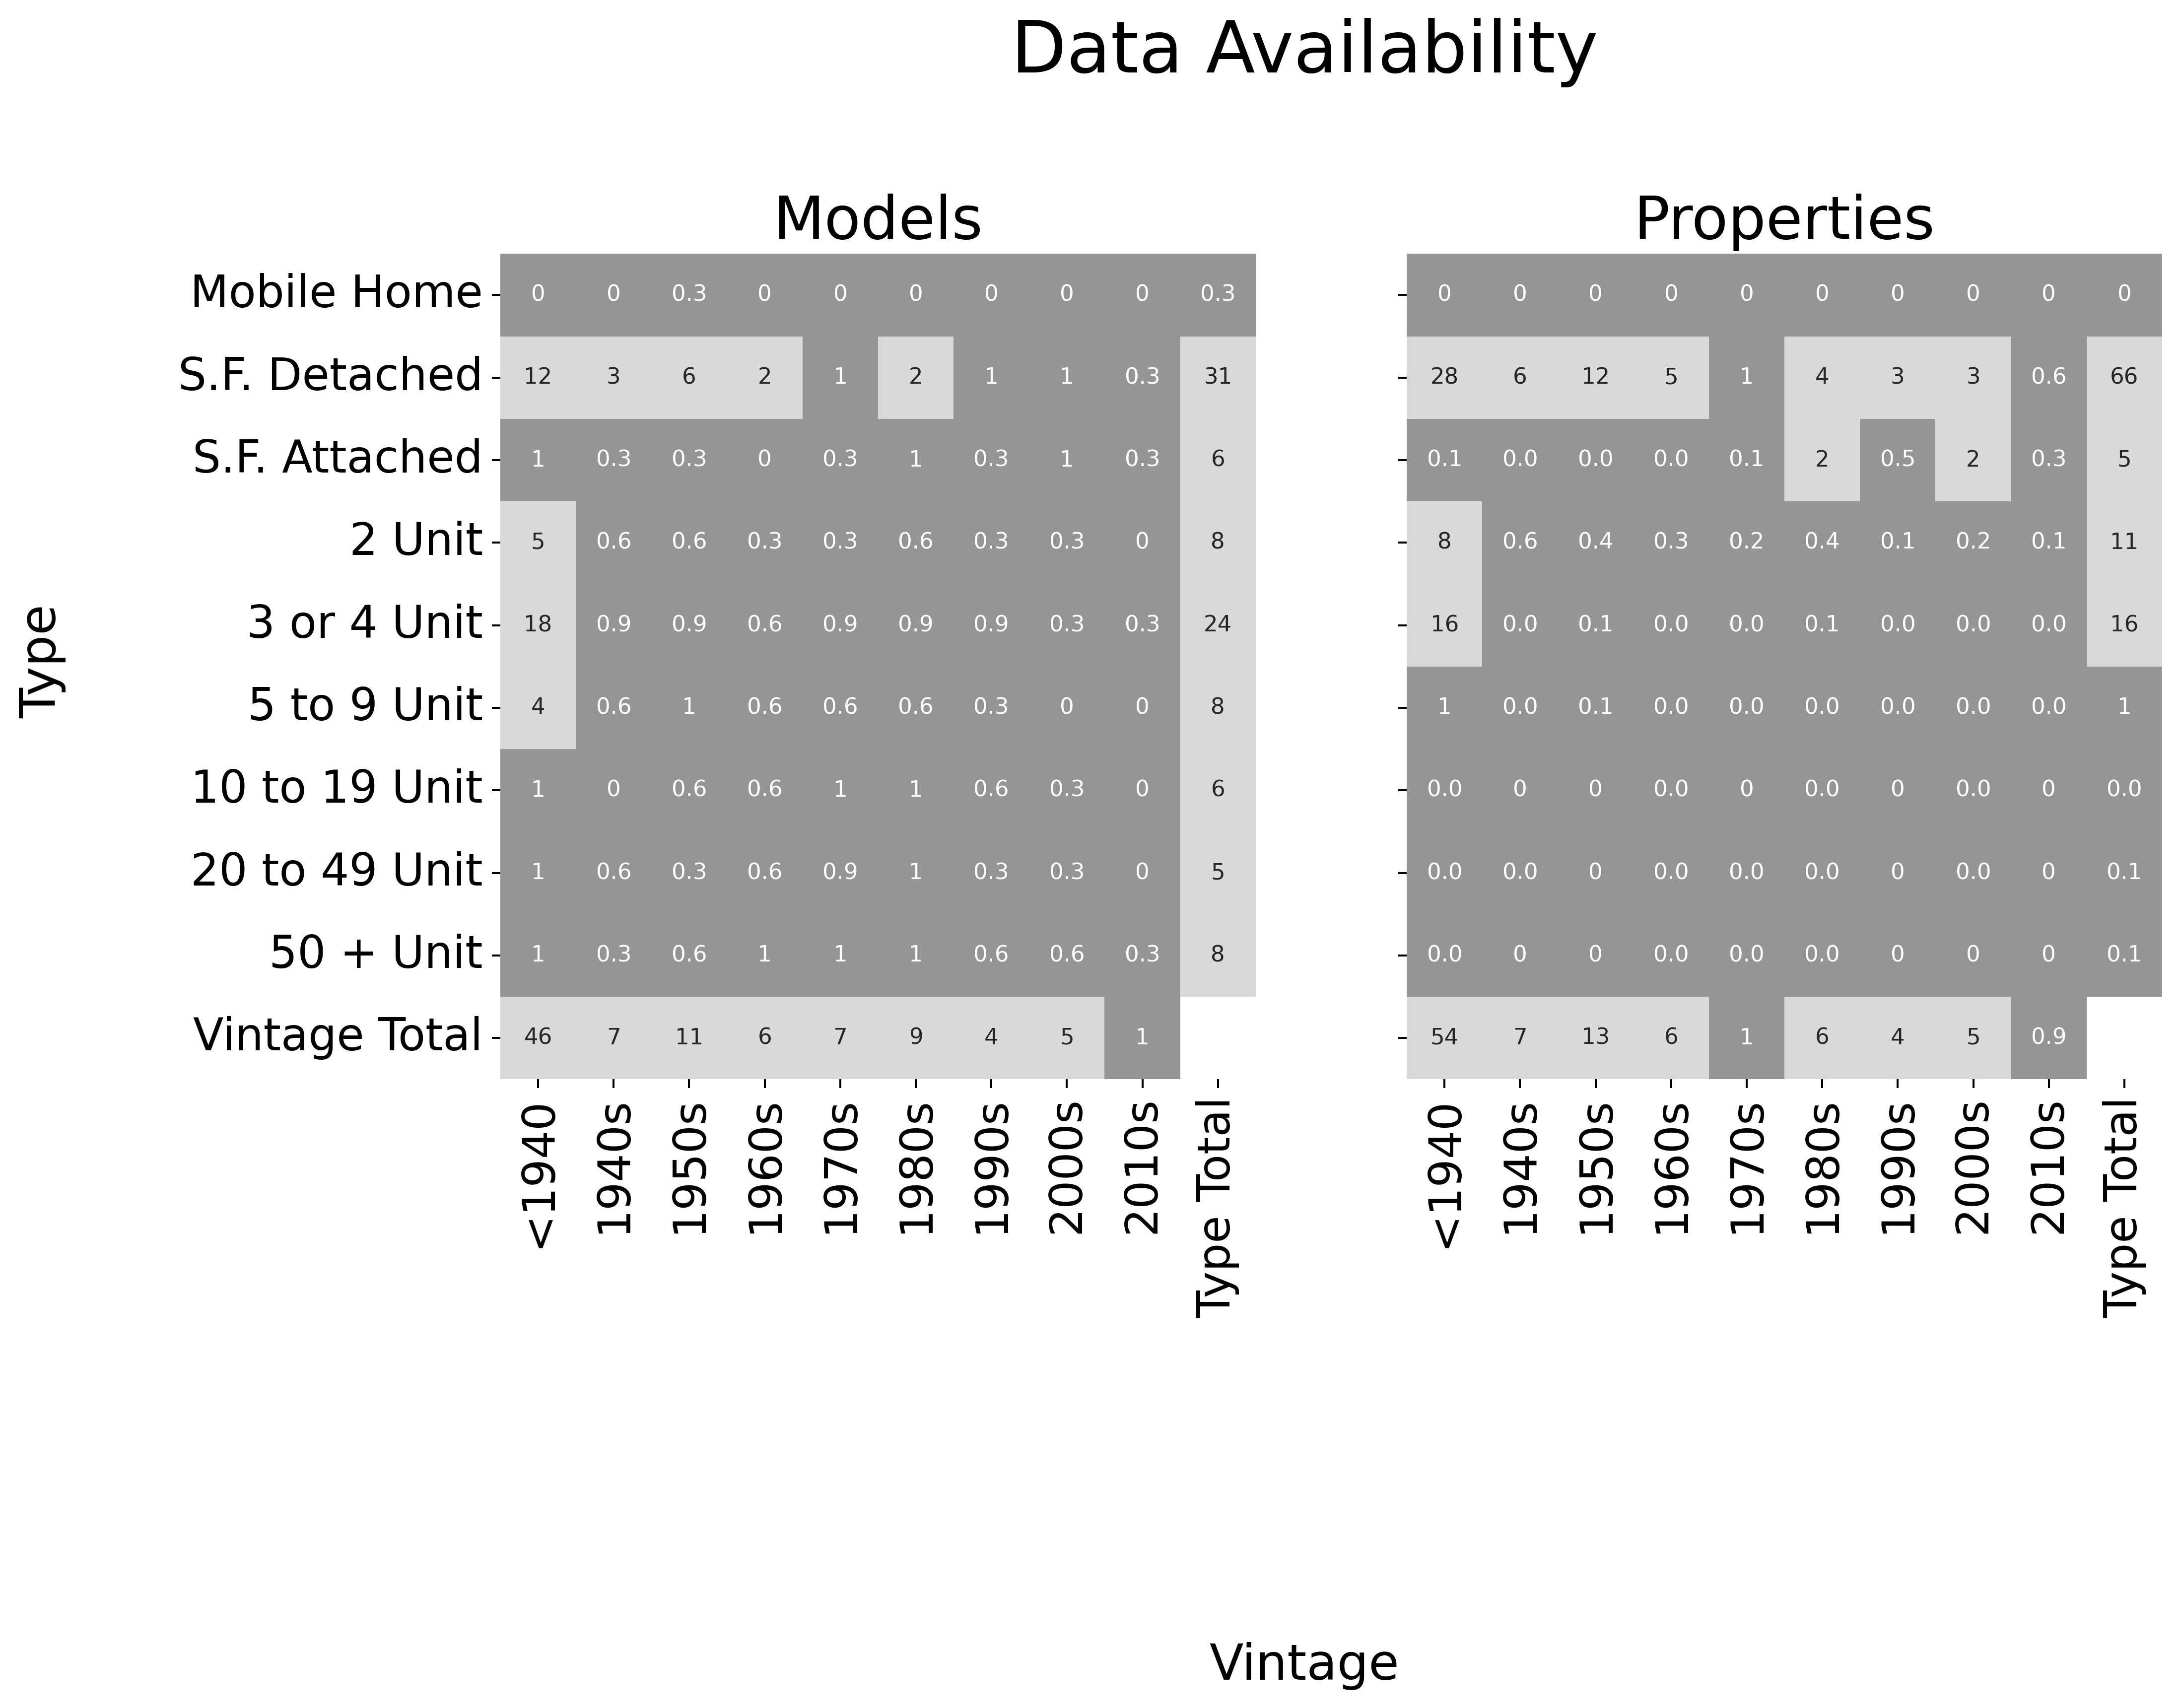

In [25]:
colors = sns.color_palette('Greys', 3)
levels = [0, 2, 100.0]
cmap, norm = mpl.colors.from_levels_and_colors(levels, colors, extend="max")
m = 0
p = 0
f,axs = plt.subplots(nrows=1,ncols=2,figsize=(12, 6),dpi=360,sharex=True,sharey=True)
sns.heatmap(nrel_plot,ax=axs[0],cbar=False, annot=True,cmap = cmap.reversed(), norm=norm)
axs[0].title.set_text('Models')
axs[0].title.set_size(24)
for t in axs[0].texts:
    if float(t.get_text()) > 0 and float(t.get_text()) < 1:
        t.set_text(format(float(t.get_text()), '.1f'))
        m = m+float(t.get_text())
    else:
        t.set_text(int(float(t.get_text())))
    t.set_fontsize(9)
            
sns.heatmap(parcel_plot,cbar=False, ax=axs[1],annot=True,cmap = cmap.reversed(), norm=norm)
axs[1].title.set_text('Properties')
axs[1].title.set_size(24)
for t in axs[1].texts:
    if float(t.get_text()) > 0 and float(t.get_text()) < 1:
        t.set_text(format(float(t.get_text()), '.1f'))
        p = p+float(t.get_text())

    else:
        t.set_text(int(float(t.get_text())))
    t.set_fontsize(9)

# for i, each_vintage in enumerate(nrel_plot.columns):
#     for j, each_type in enumerate(nrel_plot.index):
#         if nrel_plot.iloc[j, i] == 0:
#             rect = Rectangle((i, j), 1, 1, ec='cyan', fc='none', lw=2, hatch='//')
#             rect2 = Rectangle((i, j), 1, 1, ec='cyan', fc='none', lw=2, hatch='//')

#             axs[0].add_patch(rect)
#             axs[1].add_patch(rect2)
            
# f.subplots_adjust(,hspace=.75)
f.suptitle('Data Availability',y=1.1,fontsize=29)
f.text(0.5, -0.45, 'Vintage', ha='center',fontsize=20)
f.text(-0.1, 0.5, 'Type', va='center', rotation='vertical',fontsize=20)
axs[0].tick_params(axis='both', labelsize=18)
axs[1].tick_params(axis='both', labelsize=18)
plt.savefig("Figures/Final/dataavailability_2.png",bbox_inches = "tight")

In [26]:
m

21.300000000000008

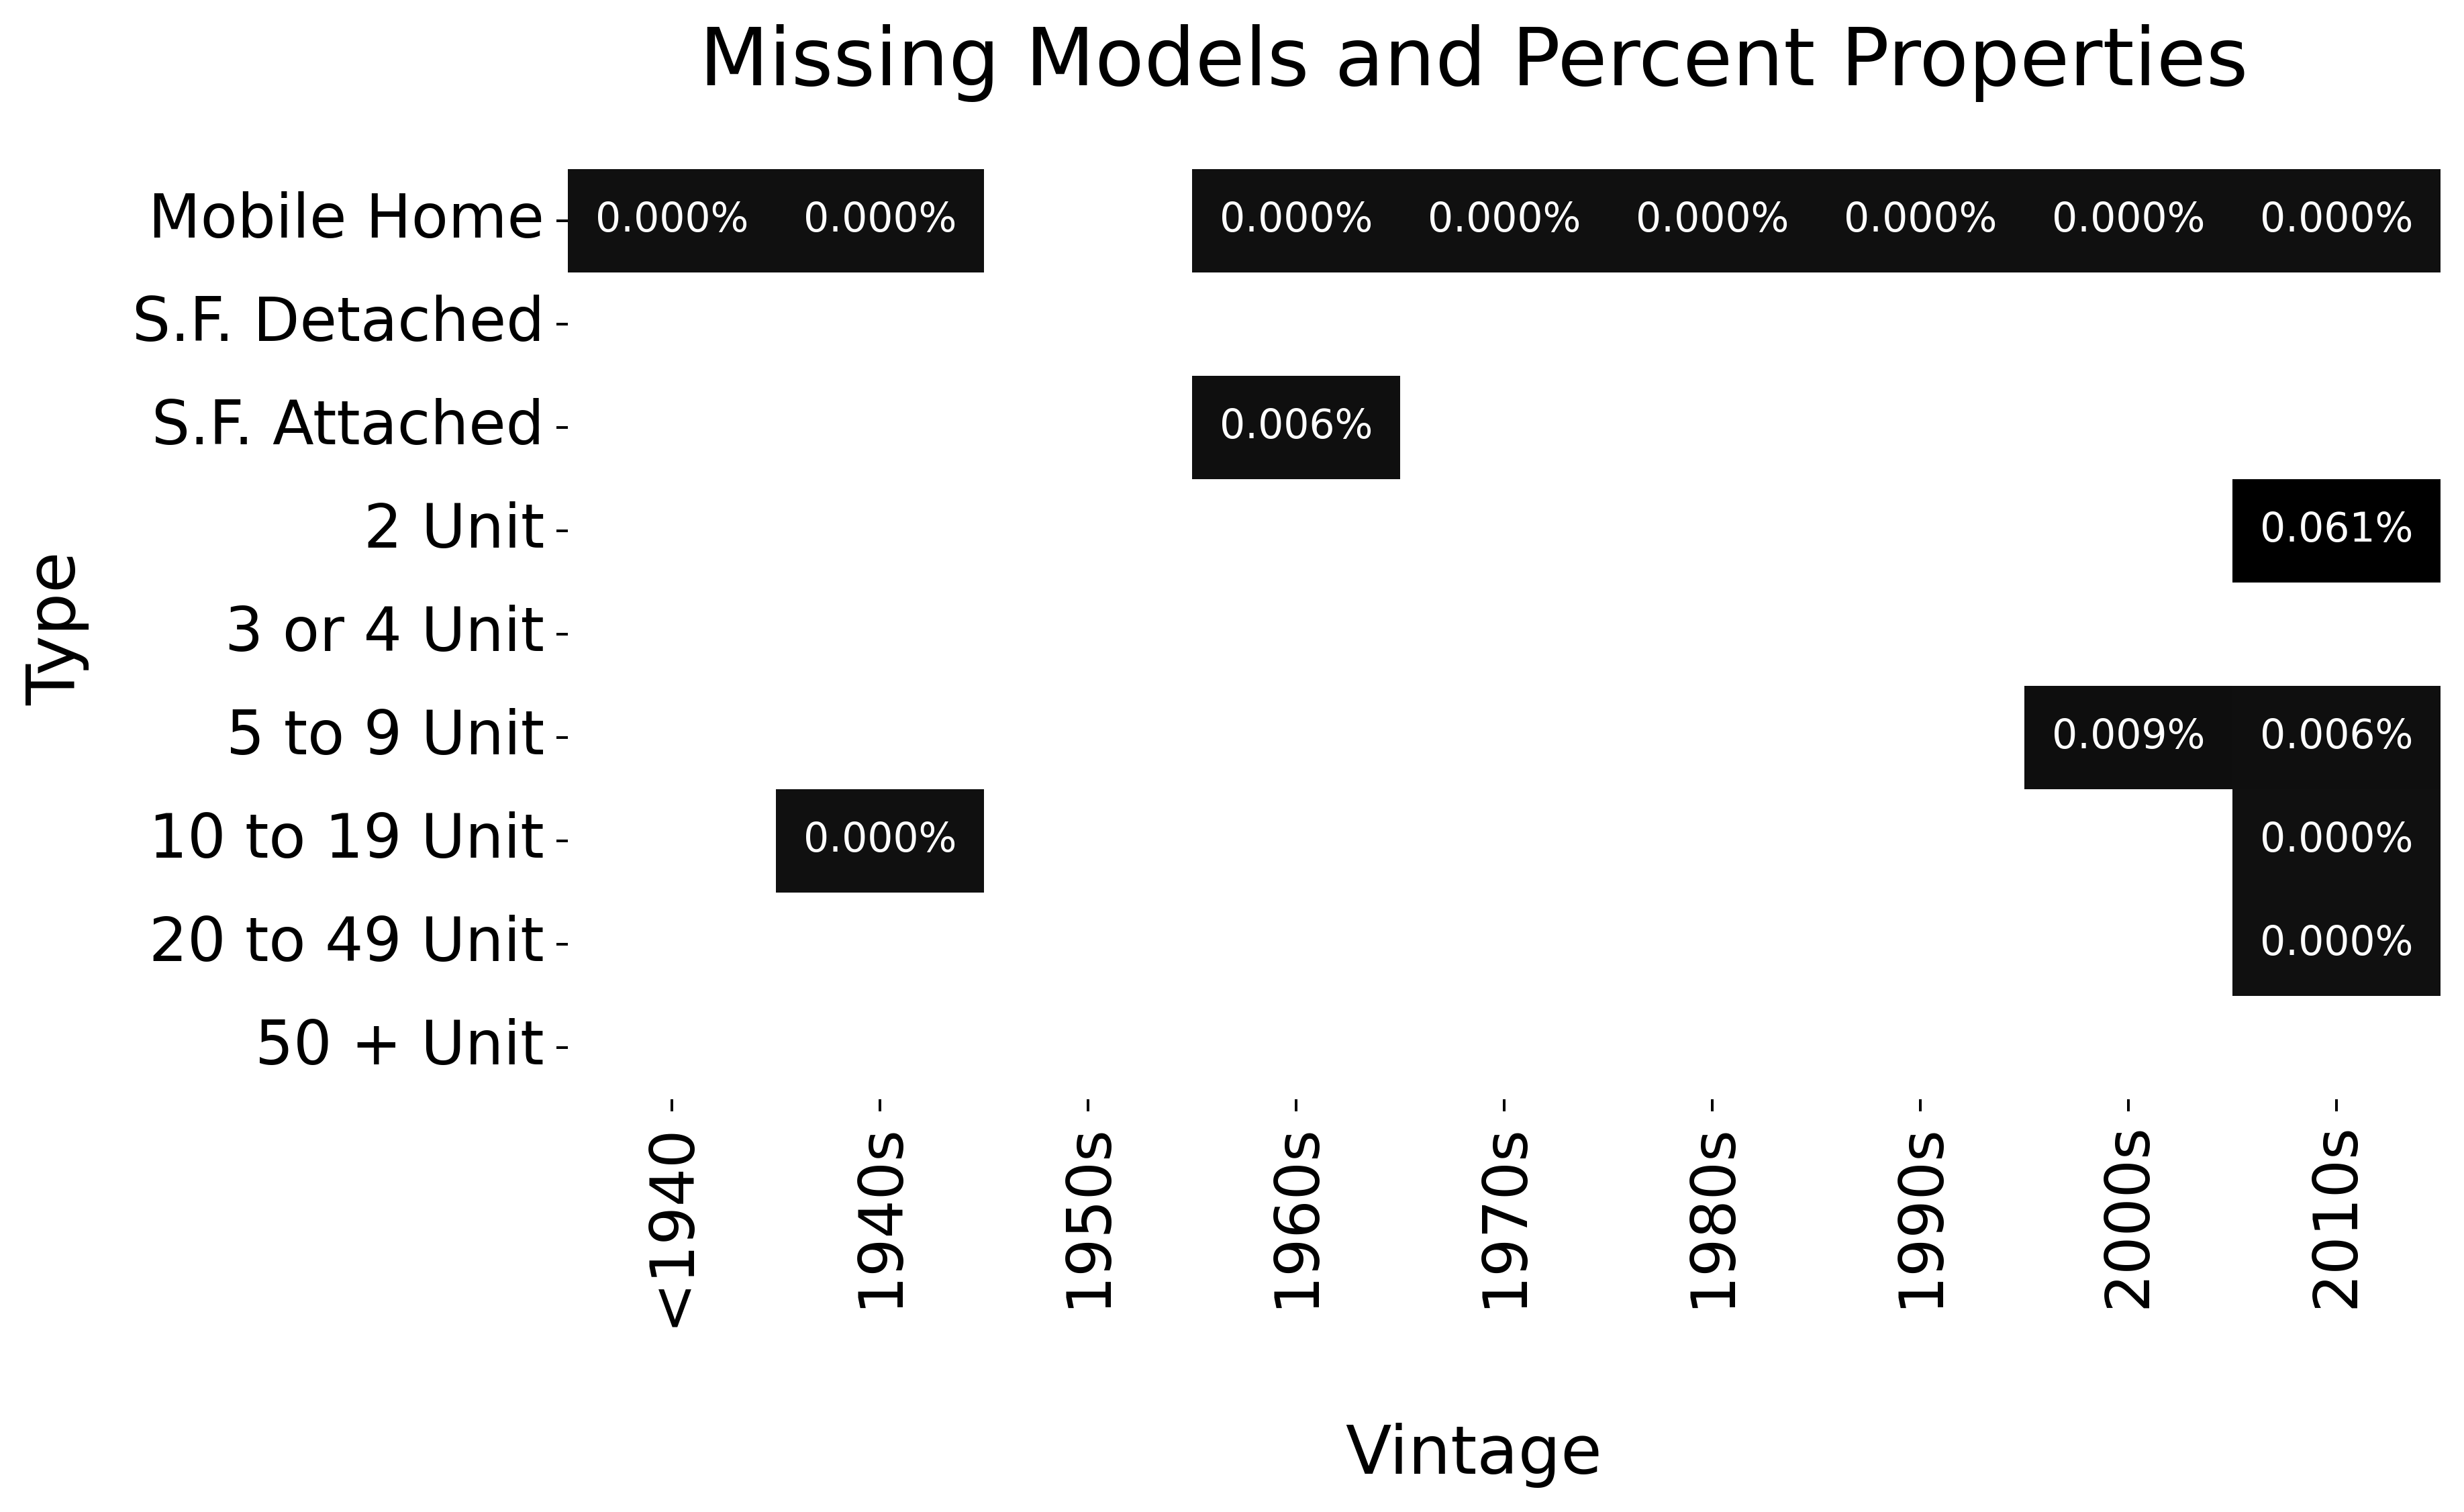

In [27]:
comparison = pd.DataFrame(index=styles,columns=vintage)
f,ax = plt.subplots(figsize=(10, 5),dpi=360)
L = 0
for each_type in comparison.index:
    for each_vin in comparison.columns:
        m = nrel_plot[each_vin][each_type]
        p = parcel_plot[each_vin][each_type]
        
        if (m ==0):
#             print(p)
            L = p + L
            comparison[each_vin][each_type] = p
        else:
            comparison[each_vin][each_type] = -1
comparison = comparison.apply(pd.to_numeric, errors='coerce',downcast='integer')
sns.heatmap(comparison,ax=ax,cmap='Greys',cbar=False,annot=True,)      
f.suptitle('Missing Models and Percent Properties',y=1,fontsize=24)
f.text(0.5, -.20, 'Vintage', ha='center',fontsize=20)
f.text(-0.1, 0.5, 'Type', va='center', rotation='vertical',fontsize=20)
ax.tick_params(axis='both', labelsize=18)
for t in ax.texts:
    if float(t.get_text()) >= 0:
        t.set_text(str(format(float(t.get_text()), '.3f')+'%'))
    else:
        t.set_text("")
    t.set_fontsize(12)
ax.set_xticklabels(labels=vintage,rotation=90,fontsize=18) 
ax.set_yticklabels(labels=styles,fontsize=18)    

plt.savefig("Figures/Final/dataavailability_2.png",bbox_inches = "tight")

In [28]:
for each_v in v_ids:
    for each_t in t_ids:
        if len(matched_parcels.loc[(matched_parcels['vintage'] == each_v) & (matched_parcels['style_type'] == each_t)]) > 0:
            for each_hr in range(13):
                matched_parcels.loc[(matched_parcels['vintage'] == each_v) & (matched_parcels['style_type'] == each_t), str(each_hr)] = hvi_p.loc[(hvi_p['vintage'] == each_v) & (hvi_p['type'] == each_t), str(each_hr)].values[0]

/tmp/ipykernel_48545/84647900.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_parcels.loc[(matched_parcels['vintage'] == each_v) & (matched_parcels['style_type'] == each_t), str(each_hr)] = hvi_p.loc[(hvi_p['vintage'] == each_v) & (hvi_p['type'] == each_t), str(each_hr)].values[0]
/tmp/ipykernel_48545/84647900.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_parcels.loc[(matched_parcels['vintage'] == each_v) & (matched_parcels['style_type'] == each_t), str(each_hr)] = hvi_p.loc[(hvi_p

In [32]:
matched_parcels['LOC_ID'] = matched_parcels.index
matched_parcels.to_csv(data_file_path + 'matched_parcels.csv',index=False)

In [30]:
matched_parcels

vintage     style_type     ac_type  num_units         0  \
F_585759_2914301   1980s  10 to 19 Unit  Central AC         12  0.000000   
F_574540_2913781   1980s  10 to 19 Unit        None         12  0.000000   
F_580703_2924721   1980s  10 to 19 Unit        None         10  0.000000   
F_578890_2918142   1980s  10 to 19 Unit     Room AC         12  0.000000   
F_585147_2918683   <1940  10 to 19 Unit  Central AC         13  0.500000   
...                  ...            ...         ...        ...       ...   
F_565891_2917701   <1940  S.F. Detached        None          1  0.057143   
F_565936_2917724   <1940  S.F. Detached        None          1  0.057143   
F_565400_2917693   <1940  S.F. Detached        None          1  0.057143   
F_565737_2918111   <1940  S.F. Detached        None          1  0.057143   
F_583752_2912087   2010s  S.F. Detached  Central AC          1  0.000000   

                         1         2         3         4         5         6  \
F_585759_2914301  0.333333  0.333333  0.333333  0.666667  0.666667  0.666667   
F_574540_2913781  0.333333  0.333333  0.333333  0.666667  0.666667  0.666667   
F_580703_2924721  0.333333  0.333333  0.333333  0.666667  0.666667  0.666667   
F_578890_2918142  0.333333  0.333333  0.333333  0.666667  0.666667  0.666667   
F_585147_2918683  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
...                    ...       ...       ...       ...       ...       ...   
F_565891_2917701  0.742857  0.971429  1.000000  1.000000  1.000000  1.000000   
F_565936_2917724  0.742857  0.971429  1.000000  1.000000  1.000000  1.000000   
F_565400_2917693  0.742857  0.971429  1.000000  1.000000  1.000000  1.000000   
F_565737_2918111  0.742857  0.971429  1.000000  1.000000  1.000000  1.000000   
F_583752_2912087  0.000000  0.000000  0.000000  1.000000  1.000000  1.000000   

                         7         8         9        10   11   12  
F_585759_2914301  0.666667  0.666667  0.666667  0.666667  1.0  1.0  
F_574540_2913781  0.666667  0.666667  0.666667  0.666667  1.0  1.0  
F_580703_2924721  0.666667  0.666667  0.666667  0.666667  1.0  1.0  
F_578890_2918142  0.666667  0.666667  0.666667  0.666667  1.0  1.0  
F_585147_2918683  1.000000  1.000000  1.000000  1.000000  1.0  1.0  
...                    ...       ...       ...       ...  ...  ...  
F_565891_2917701  1.000000  1.000000  1.000000  1.000000  1.0  1.0  
F_565936_2917724  1.000000  1.000000  1.000000  1.000000  1.0  1.0  
F_565400_2917693  1.000000  1.000000  1.000000  1.000000  1.0  1.0  
F_565737_2918111  1.000000  1.000000  1.000000  1.000000  1.0  1.0  
F_583752_2912087  1.000000  1.000000  1.000000  1.000000  1.0  1.0  

[32871 rows x 17 columns]